In [5]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy.fft import rfft, rfftfreq, irfft

In [437]:
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
   # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))

In [457]:
x=np.linspace(1,100, 100)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
#conv_points=np.convolve(np.asarray(points2),x, "same")
conv_points=np.convolve(np.asarray(points1),np.asarray(points1), "same")
points2=conv_points


C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [458]:
#conv_points[:10]

In [459]:
points1[:10]

[31.381773290676037,
 30.25565380596207,
 29.22998974617519,
 28.285538024368687,
 30.032278537200334,
 29.59262081217367,
 30.957579142462425,
 31.381215477052933,
 31.188804467263388,
 30.318297761398313]

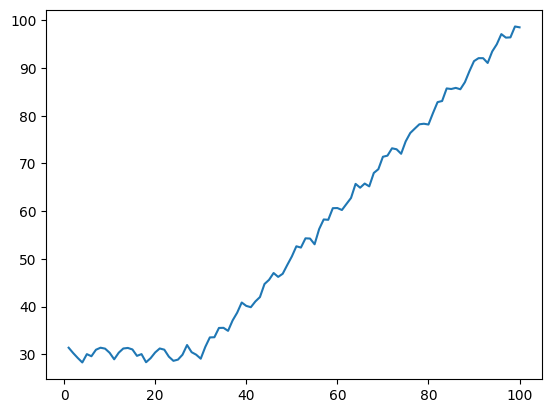

In [460]:
plt.plot(x, points1)

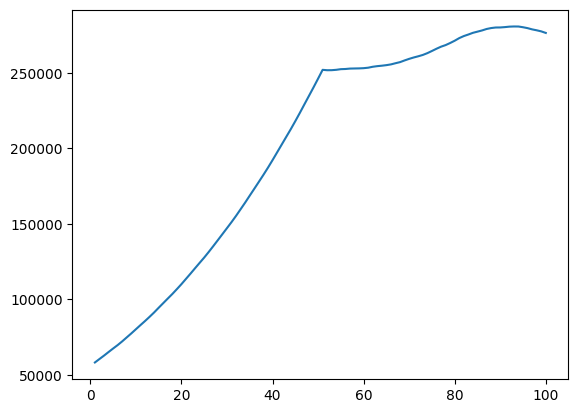

In [461]:
plt.plot(x, points2)

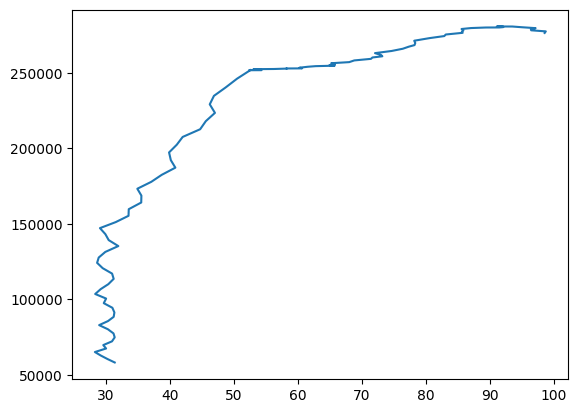

In [462]:
plt.plot(points1, points2)

In [463]:
points1[:10]

[31.381773290676037,
 30.25565380596207,
 29.22998974617519,
 28.285538024368687,
 30.032278537200334,
 29.59262081217367,
 30.957579142462425,
 31.381215477052933,
 31.188804467263388,
 30.318297761398313]

In [464]:
points1=[point for point in points1]
freq1=rfft(points1)
real_freq=[i.real for i in freq1]
im_freq=[i.imag for i in freq1]
#points2=[point[0] for point in points2]
freq2=rfft(points2)
real_freq2=[i.real for i in freq2]
im_freq2=[i.imag for i in freq2]

In [465]:
points1[:10]

[31.381773290676037,
 30.25565380596207,
 29.22998974617519,
 28.285538024368687,
 30.032278537200334,
 29.59262081217367,
 30.957579142462425,
 31.381215477052933,
 31.188804467263388,
 30.318297761398313]

In [466]:
rfft([31.38177329,30.25565381,29.22998975,28.28553802,30.03227854])

array([149.18523341+0.j        ,   3.48072954-0.7675773j ,
         0.38108698+0.76693028j])

In [467]:
rfft(points1)[0].real

5493.716828189863

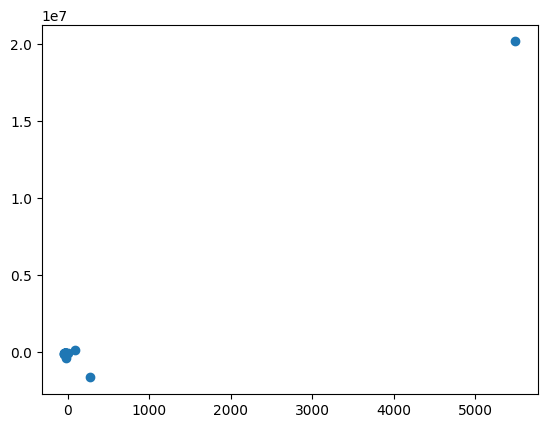

In [468]:
plt.scatter(real_freq, real_freq2)

In [469]:
len(real_freq)

51

In [470]:
len(x)
x2=np.linspace(1,51,51)

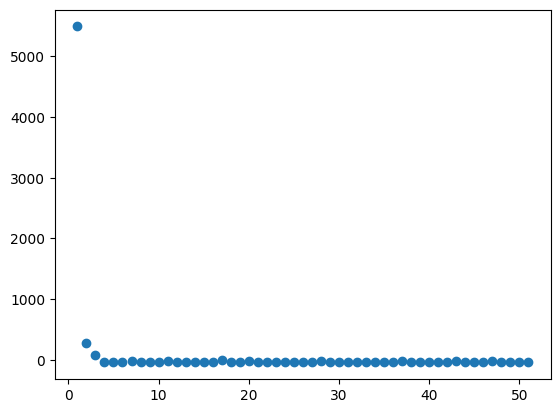

In [471]:
plt.scatter(x2, real_freq)

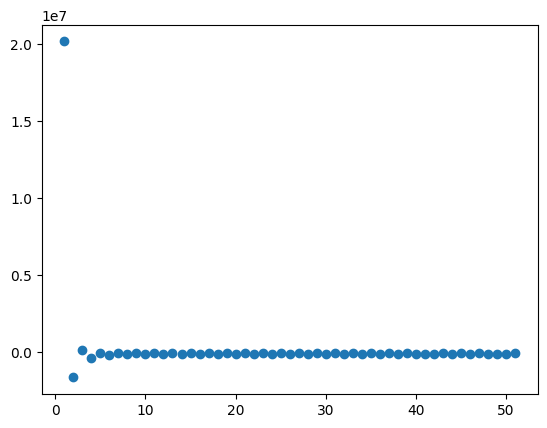

In [472]:
plt.scatter(x2, real_freq2)

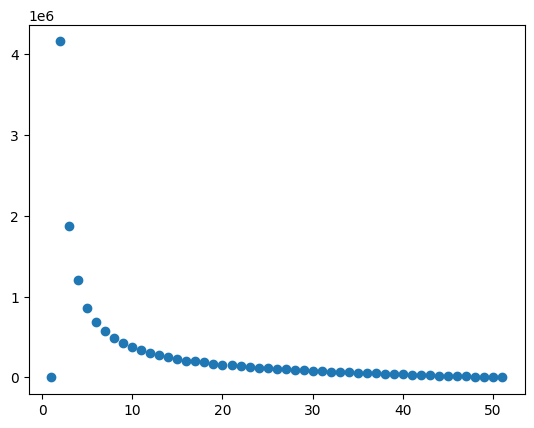

In [473]:
plt.scatter(x2, im_freq2)

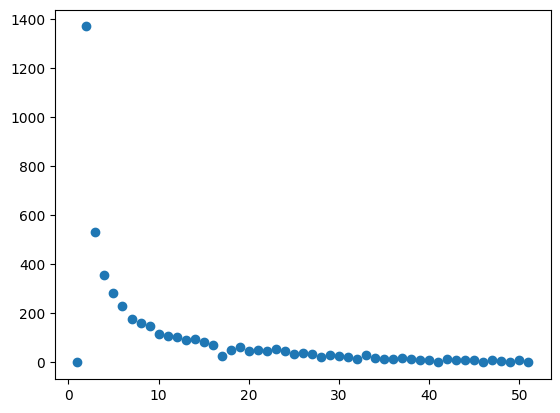

In [474]:
plt.scatter(x2, im_freq)

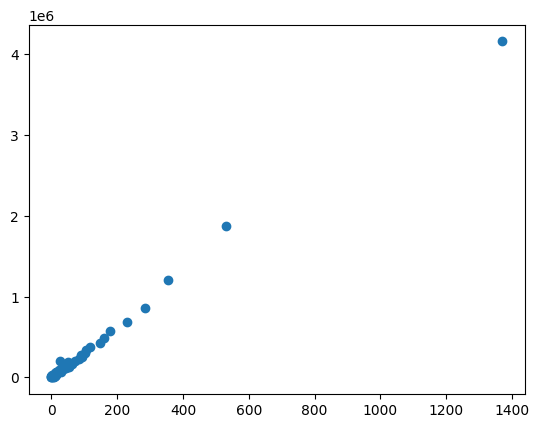

In [475]:
plt.scatter(im_freq, im_freq2)

In [416]:
im_freq[:10]

[0.0,
 1369.3630272611367,
 530.6049426844041,
 354.7035652591812,
 283.39632078270046,
 228.79367857048874,
 177.4765744844588,
 161.6010086110969,
 148.8510549877251,
 116.51139180324293]

In [417]:
im_freq2[:10]

[0.0,
 1701.5526543132692,
 748.9829040292016,
 506.73582055355234,
 386.9113334981654,
 308.3834260652296,
 250.59981330840827,
 217.220779775788,
 192.1811966233946,
 164.4671623192197]

[355.  356.2 357.4 358.6 359.8 361. ]


C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


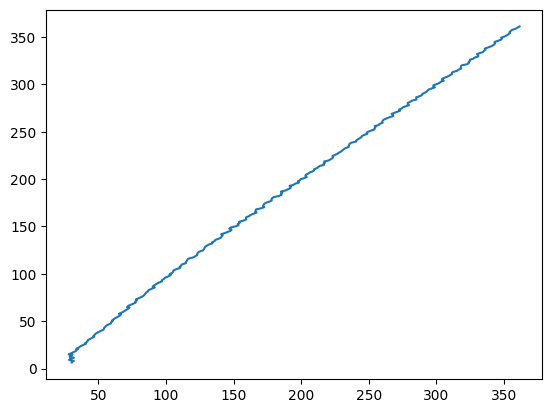

In [425]:
num_training_samples=50
length=6

x_train=[]
for i in range(num_training_samples):
    index=i+i*6+12
    x_train.append(np.linspace(index, index+6, 6))
    
    
print(x_train[49])
f1 = []
f2 = []
for i in x_train:
    values1 = []
    values2 = []
    for index in i:
        values1.append(func1(index).item())
        values2.append(func2(index).item())
    f1.append(values1)
    f2.append(values2)

flat_x = [x for xs in f1 for x in xs]
flat_y = [x for xs in f2 for x in xs]
plt.plot(flat_x, flat_y)

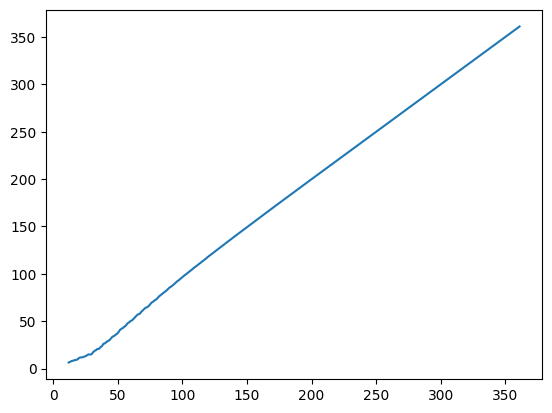

In [419]:
x_points=np.asarray(x_train)
x_points=x_points.flatten()
plt.plot(x_points,flat_y)

In [420]:
f1_real=[]
f1_imag=[]
f2_real=[]
f2_imag=[]

vis_real_1=[]
vis_real_2=[]
vis_imag_1=[]
vis_imag_2=[]

for i in range(num_training_samples):
    value1=rfft(f1[i])
    value2=rfft(f2[i])
    f1_real.append([i.real for i in value1])
    
    
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])
    
    
x_train_real=torch.tensor(np.asarray(f1_real))
x_train_imag=torch.tensor(np.asarray(f1_imag)[:,1:3])

In [421]:
import mogptk
m1_real=mogptk.LoadModel("first_real_compl")
m2_real=mogptk.LoadModel('second_real_compl')
m3_real=mogptk.LoadModel('third_real_compl')
m4_real=mogptk.LoadModel('fourth_real_compl')
m1_im=mogptk.LoadModel('first_im_compl')
m2_im=mogptk.LoadModel('second_im_compl')
m3_im=mogptk.LoadModel('third_im_compl')
m4_im=mogptk.LoadModel('fourth_im_compl')

In [422]:
_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

In [423]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 

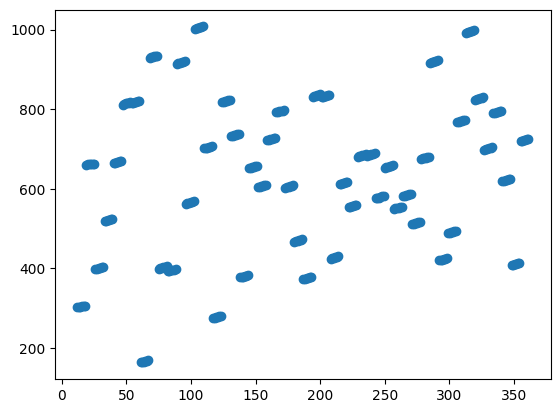

In [424]:
from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()

plt.scatter(x_points, values2)

In [432]:
#alternative data generation
x=np.linspace(1,500, 1200)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
conv_points=np.convolve(np.asarray(points2),x, "same")
training_points=[]

    

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [433]:
conv_points[0:6]

array([5910338.39160754, 5941009.23800803, 5971784.83249413,
       6002665.34783905, 6033650.95613574, 6064741.83303288])

In [434]:
i=0
while i< len(conv_points):
    training_points.append(conv_points[i:i+6])
    i+=6

In [435]:
len(training_points)

200

In [431]:
training_points[:10]

[array([2944788.14784904, 2975457.64875045, 3006336.99342235,
        3037426.87597585, 3068727.99122499, 3100241.03301717]),
 array([3131966.69461255, 3163905.6699247 , 3196058.65379095,
        3228426.34119245, 3261009.42811741, 3293808.60783838]),
 array([3326824.57436455, 3360058.02174657, 3393509.64498523,
        3427180.13734141, 3461070.19447911, 3495180.51104138]),
 array([3529511.78103434, 3564064.6986339 , 3598839.95792414,
        3633838.25329265, 3669060.27861785, 3704506.72772141]),
 array([3740178.29618311, 3776075.67787122, 3812199.56706132,
        3848550.65824833, 3885129.64516288, 3921937.22198143]),
 array([3958974.08248716, 3996240.92126305, 4033738.4331417 ,
        4071467.31174042, 4109428.25174418, 4147621.94718556]),
 array([4186049.09171764, 4224710.37939093, 4263606.50455517,
        4302738.16181525, 4342106.04540278, 4381710.84915558]),
 array([4421553.26755984, 4461633.99412368, 4501953.72287113,
        4542513.14801522, 4583312.9641514 , 4624353.8650

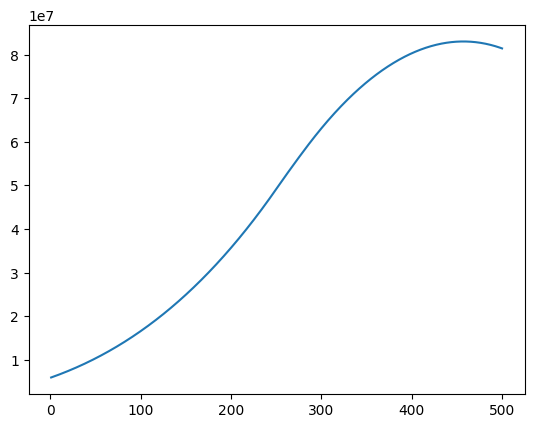

In [436]:
plt.plot(x,conv_points)

In [ ]:
# new function with convolution

In [476]:
def func1(t):
    return torch.tensor(np.exp(-2* t**2))

#second function convolution 
def func2(t):
    return torch.tensor(np.sqrt(np.pi/(2+3))* np.exp((-6/5)*t**2))

In [478]:
x=np.linspace(1,100, 100)
points1=[func1(i).numpy() for i in x ]
points2=[func2(i).numpy() for i in x]

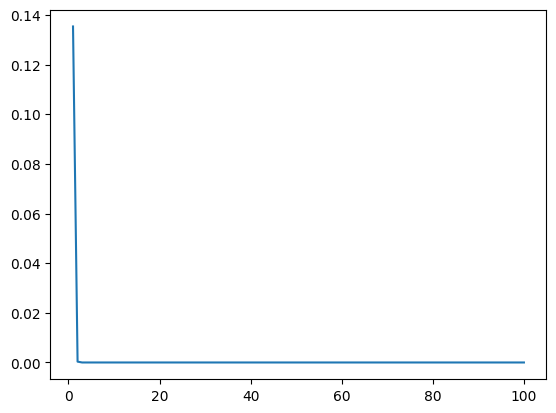

In [479]:
plt.plot(x, points1)

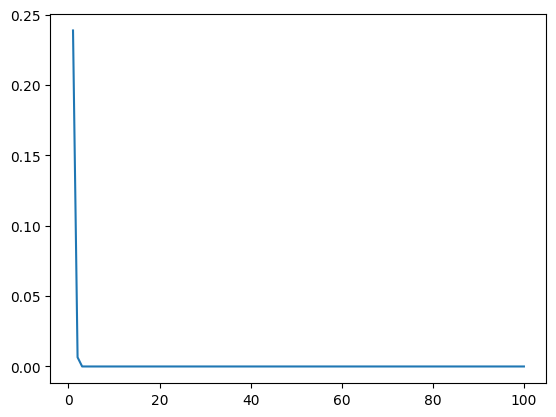

In [480]:
plt.plot(x, points2)

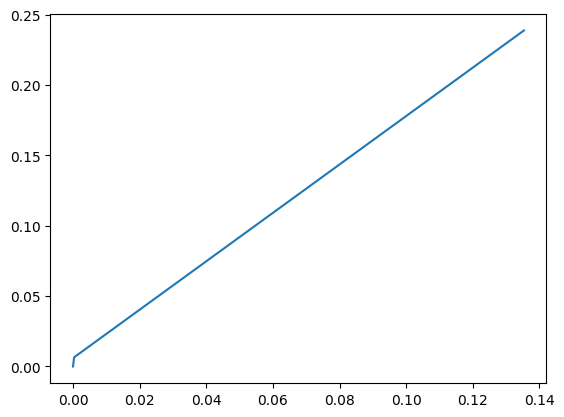

In [481]:
plt.plot(points1, points2)

In [482]:
points1=[point for point in points1]
freq1=rfft(points1)
real_freq=[i.real for i in freq1]
im_freq=[i.imag for i in freq1]
#points2=[point[0] for point in points2]
freq2=rfft(points2)
real_freq2=[i.real for i in freq2]
im_freq2=[i.imag for i in freq2]

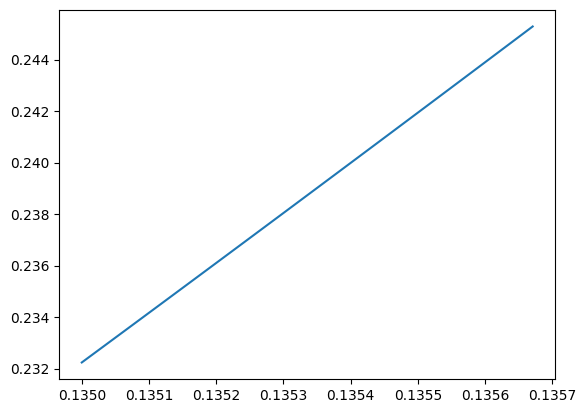

In [484]:
plt.plot(real_freq, real_freq2)

In [485]:

def func1(t):
    return torch.tensor([np.sin(t) + np.cos(t ** 2) + max(30, t)])


def func2(t):
    return torch.tensor((torch.tanh(((func1(t)) / 100) * 2) ))

In [493]:
x=np.linspace(1,500, 600)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
conv_points=np.convolve(np.asarray(points1),np.asarray(points1), "same")
points2=conv_points
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+6])
    f1.append(points1[i:i+6])
    i+=6


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(100):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

f1_imag_cleaned = np.asarray(f1_imag)[:, 1:3]
x_train_imag = torch.tensor(f1_imag_cleaned)

y_train_real = torch.tensor(np.asarray(f2_real))
y_train_imag = torch.tensor(np.asarray(f2_imag))

[[0.0, -1.674525898125628, 0.17577234234257455, 0.0], [0.0, -0.791528172985587, -1.3350374129503997, 0.0], [0.0, 1.6579277882955261, -0.8292923489363212, 0.0], [0.0, 1.4125909046456906, -0.4212180863251266, 0.0], [0.0, -0.0871531637003421, -1.0203780951569228, 0.0], [0.0, -1.4300862180590483, -0.038817428925871034, 0.0], [0.0, 1.4889091608209655, 1.3042523446869265, 0.0], [0.0, 6.838506576266557, -0.3606253481029693, 0.0], [0.0, 6.757655422866739, 1.3126733457553215, 0.0], [0.0, 4.344749761544707, -0.7141337620406651, 0.0]] imag


C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [494]:
m1_real=mogptk.LoadModel("first_real_compl_conv_custom")
m2_real=mogptk.LoadModel('second_real_compl_conv_custom')
m3_real=mogptk.LoadModel('third_real_compl_conv_custom')
m4_real=mogptk.LoadModel('fourth_real_compl_conv_custom')
m1_im=mogptk.LoadModel('first_im_compl_conv_custom')
m2_im=mogptk.LoadModel('second_im_compl_conv_custom')
m3_im=mogptk.LoadModel('third_im_compl_conv_custom')
m4_im=mogptk.LoadModel('fourth_im_compl_conv_custom')

In [498]:
_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

In [499]:
first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result)  

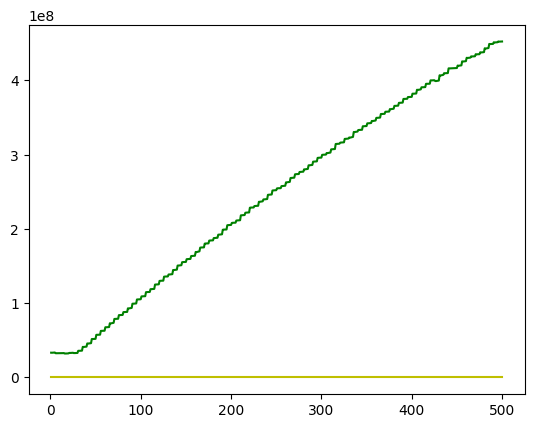

In [507]:
from scipy.fft import irfft
values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
x_points=x
plt.plot(x, values2, c="g")

plt.plot(x,x_points, c="y")
plt.show()

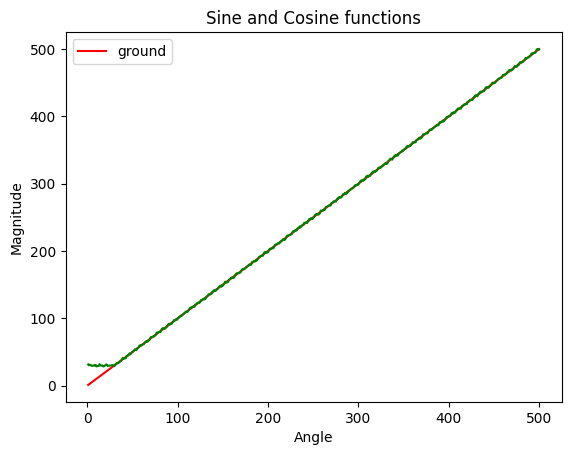

In [513]:
plt.plot(x,x, c="r", label="ground")
#plt.plot(x, values2,c="b")
plt.plot(x,points1, c="g")
plt.xlabel("Angle") 
plt.ylabel("Magnitude") 
plt.title("Sine and Cosine functions") 
plt.legend() 
plt.show()

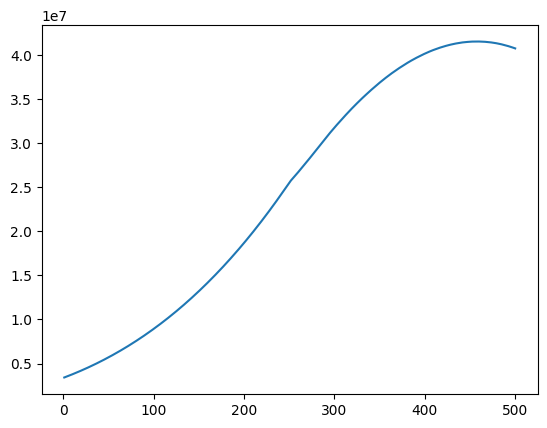

In [501]:
plt.plot(x,points2)

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


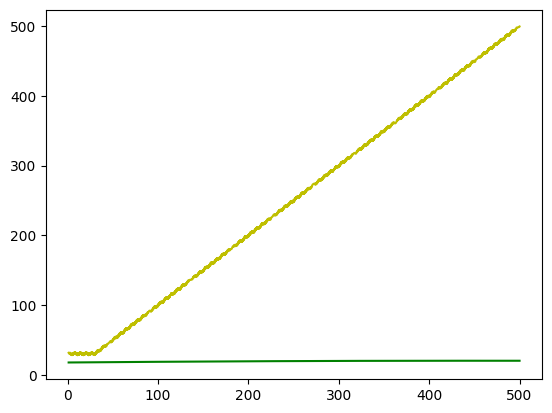

In [519]:
def func1(t):
    return torch.tensor([np.sin(t) + np.cos(t ** 2) + max(30, t)])


def func2(t):
    return torch.tensor((torch.tanh(((func1(t)) / 100) * 2) ))



x=np.linspace(1,500, 7200)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
conv_points=np.log(np.convolve(np.asarray(points1),np.asarray(points1), "same"))
points2=conv_points
plt.plot(x, points2,c="g")
plt.plot(x,points1, c="y")


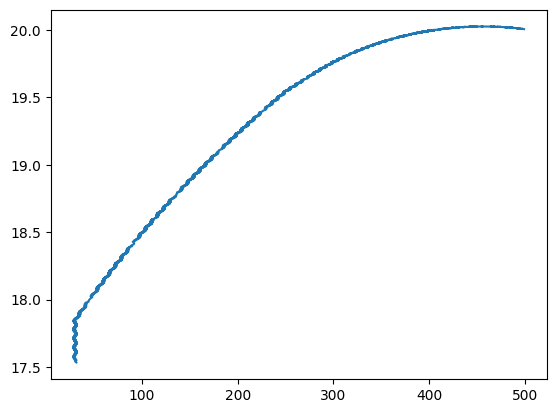

In [520]:
plt.plot(points1,points2)

In [521]:
points1=[point for point in points1]
freq1=rfft(points1)
real_freq=[i.real for i in freq1]
im_freq=[i.imag for i in freq1]
#points2=[point[0] for point in points2]
freq2=rfft(points2)
real_freq2=[i.real for i in freq2]
im_freq2=[i.imag for i in freq2]

In [583]:
np.abs(freq1[:10])

array([1809736.77221688,  571159.98142004,  284612.66581647,
        188672.22349744,  140366.24019314,  111327.2728118 ,
         91927.9381873 ,   78077.31852246,   67628.36211088,
         59672.26622115])

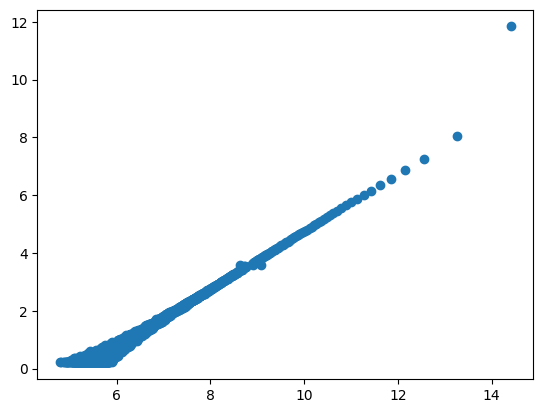

In [590]:
plt.scatter(np.log(np.abs(freq1)), np.log(np.abs(freq2)))

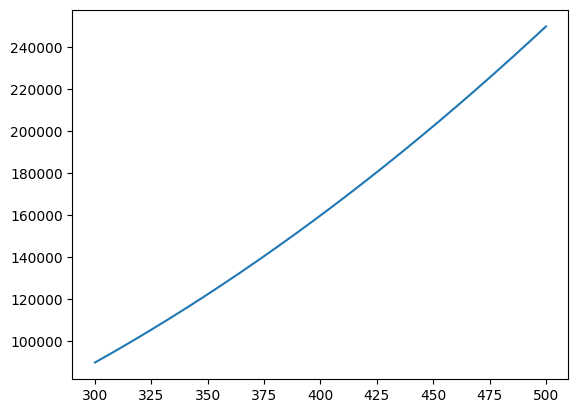

In [586]:
x=np.linspace(300,500, 300)
plt.plot(x, x**2)

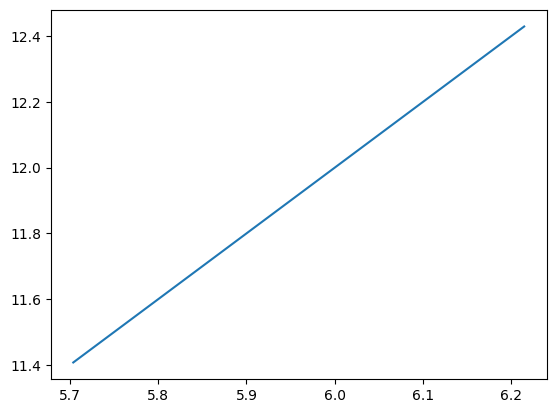

In [587]:
plt.plot(np.log(x), np.log(x**2))

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


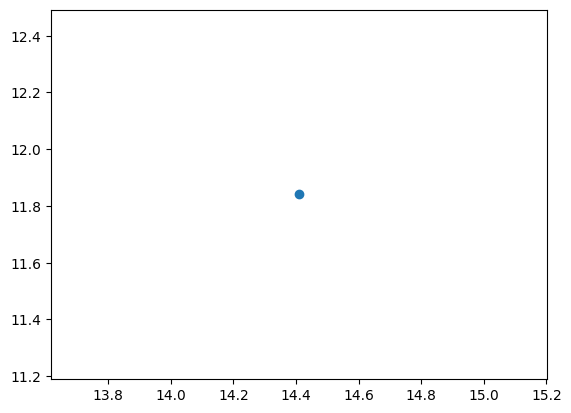

In [549]:
plt.scatter(np.log(np.asarray(real_freq)), np.log(np.asarray(real_freq2)))

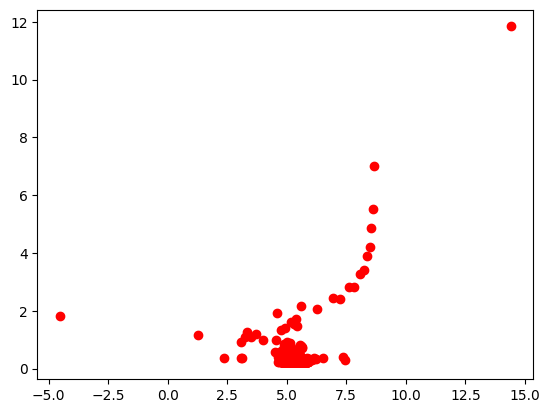

In [578]:
plt.scatter(np.log(np.abs(np.asarray(real_freq))), np.log(np.abs(np.asarray(real_freq2))), c="r")


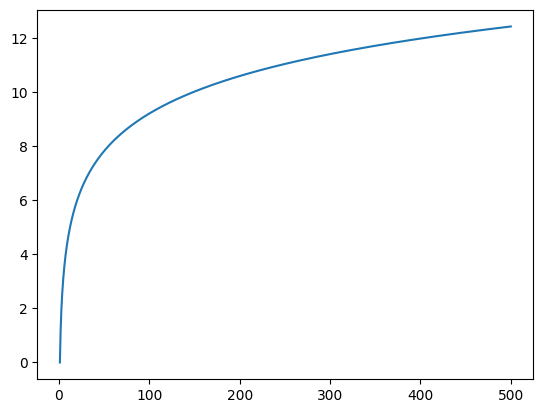

In [560]:
plt.plot(x, np.log(np.asarray(x)**2))

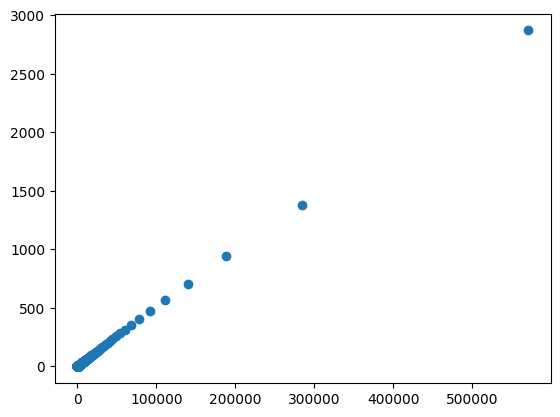

In [524]:
plt.scatter(im_freq, im_freq2)

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[[0.0, -0.3032478902910266, -2.3016858501316824, 0.0], [0.0, 0.882350645692231, 2.4555167219659175, 0.0], [0.0, 1.6580171874473533, 0.24237171534444624, 0.0], [0.0, -2.2625585889931017, 1.4485184138765437, 0.0], [0.0, 1.5662568283145788, 2.0855335799788133, 0.0], [0.0, -2.1923527701735437, -0.9175595094306294, 0.0], [0.0, -1.2366962621662345, 2.1532680481180284, 0.0], [0.0, 0.49378503668408524, 0.019124576704723367, 0.0], [0.0, -3.4973044483489946, -1.2025332501772312, 0.0], [0.0, 0.5516129482745872, 2.510741091264495, 0.0]] imag


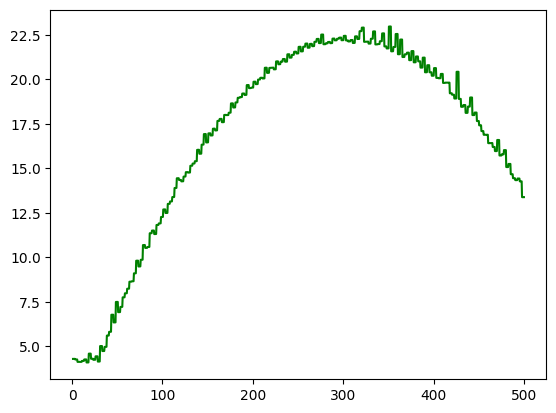

In [538]:
x=np.linspace(1,500, 1200)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
conv_points=np.log(np.convolve(np.asarray(points1),np.asarray(points1), "same"))
points2=conv_points
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+6])
    f1.append(points1[i:i+6])
    i+=6


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

f1_imag_cleaned = np.asarray(f1_imag)[:, 1:3]
x_train_imag = torch.tensor(f1_imag_cleaned)

y_train_real = torch.tensor(np.asarray(f2_real))
y_train_imag = torch.tensor(np.asarray(f2_imag))

m1_real=mogptk.LoadModel("first_real_compl_conv_custom2")
m2_real=mogptk.LoadModel('second_real_compl_conv_custom2')
m3_real=mogptk.LoadModel('third_real_compl_conv_custom2')
m4_real=mogptk.LoadModel('fourth_real_compl_conv_custom2')
m1_im=mogptk.LoadModel('first_im_compl_conv_custom2')
m2_im=mogptk.LoadModel('second_im_compl_conv_custom2')
m3_im=mogptk.LoadModel('third_im_compl_conv_custom2')
m4_im=mogptk.LoadModel('fourth_im_compl_conv_custom2')

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
x_points=x
plt.plot(x, values2, c="g")
#plt.plot(points1,points2, c="y")

plt.show()

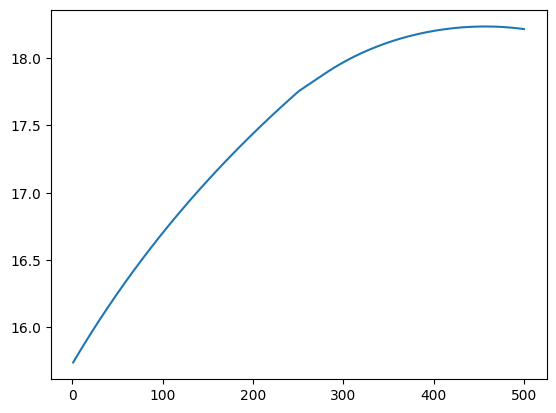

In [539]:
plt.plot(x, points2)

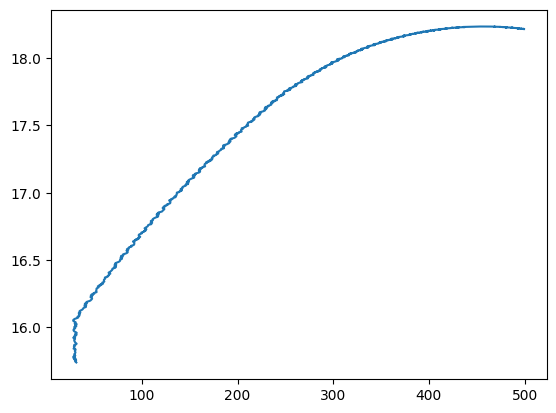

In [540]:
plt.plot(points1,points2)

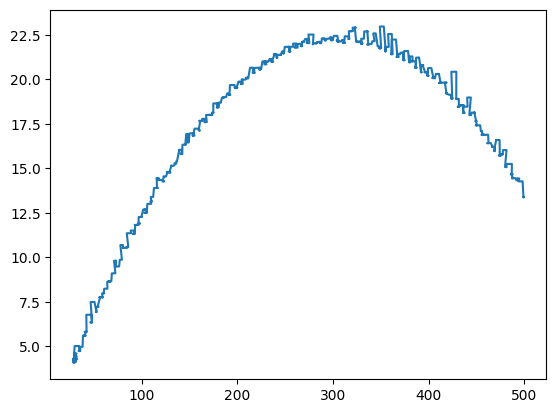

In [541]:
plt.plot(points1, values2)

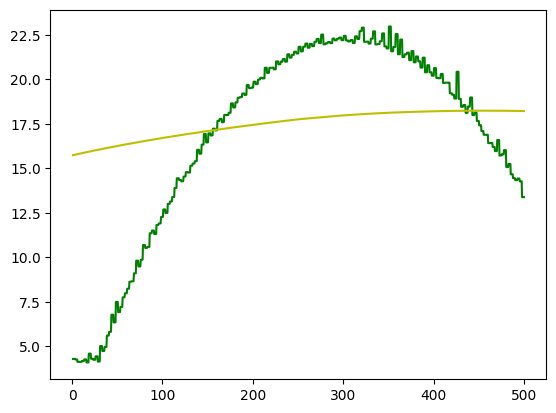

In [542]:
plt.plot(x, values2, c="g")
plt.plot(x, points2, c="y")
#plt.plot(x, points1, c="r")

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[[0.0, -0.3032478902910266, -2.3016858501316824, 0.0], [0.0, 0.882350645692231, 2.4555167219659175, 0.0], [0.0, 1.6580171874473533, 0.24237171534444624, 0.0], [0.0, -2.2625585889931017, 1.4485184138765437, 0.0], [0.0, 1.5662568283145788, 2.0855335799788133, 0.0], [0.0, -2.1923527701735437, -0.9175595094306294, 0.0], [0.0, -1.2366962621662345, 2.1532680481180284, 0.0], [0.0, 0.49378503668408524, 0.019124576704723367, 0.0], [0.0, -3.4973044483489946, -1.2025332501772312, 0.0], [0.0, 0.5516129482745872, 2.510741091264495, 0.0]] imag


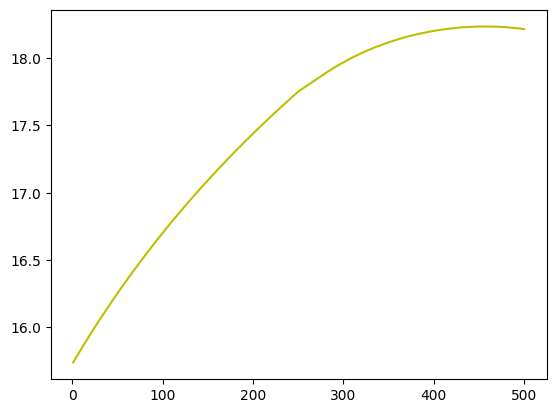

In [561]:
x=np.linspace(1,500, 1200)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
conv_points=np.log(np.convolve(np.asarray(points1),np.asarray(points1), "same"))
points2=conv_points
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+6])
    f1.append(points1[i:i+6])
    i+=6


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

f1_imag_cleaned = np.asarray(f1_imag)[:, 1:3]
x_train_imag = torch.tensor(f1_imag_cleaned)

y_train_real = torch.tensor(np.asarray(f2_real))
y_train_imag = torch.tensor(np.asarray(f2_imag))

m1_real=mogptk.LoadModel("first_real_compl_conv_custom3")
m2_real=mogptk.LoadModel('second_real_compl_conv_custom3')
m3_real=mogptk.LoadModel('third_real_compl_conv_custom3')
m4_real=mogptk.LoadModel('fourth_real_compl_conv_custom3')
m1_im=mogptk.LoadModel('first_im_compl_conv_custom3')
m2_im=mogptk.LoadModel('second_im_compl_conv_custom3')
m3_im=mogptk.LoadModel('third_im_compl_conv_custom3')
m4_im=mogptk.LoadModel('fourth_im_compl_conv_custom3')

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
x_points=x
#plt.plot(x, values2, c="g")
plt.plot(x,points2, c="y")

plt.show()

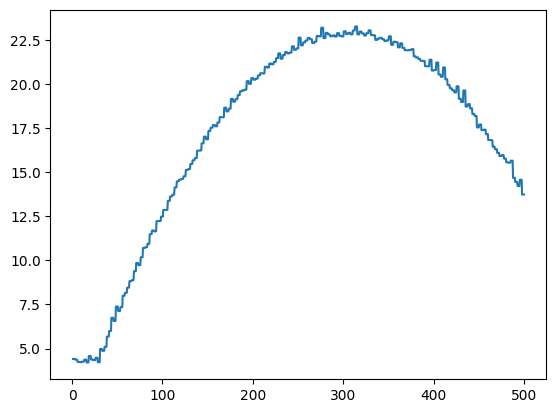

In [562]:
plt.plot(x, values2)

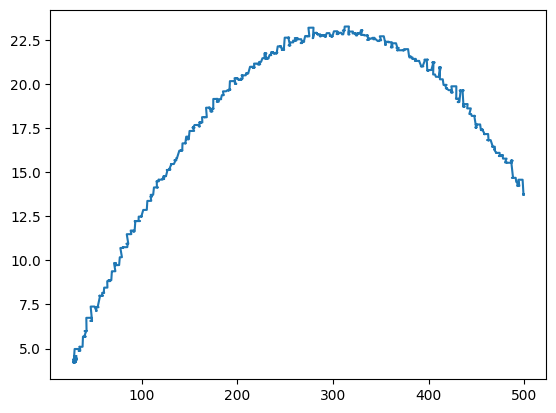

In [563]:
plt.plot(points1,values2)

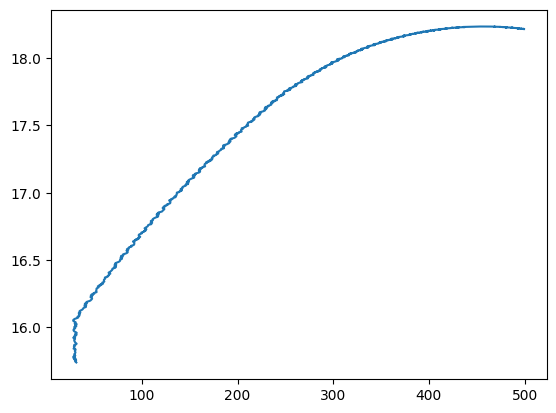

In [564]:
plt.plot(points1, points2)

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[[0.0, -0.3032478902910266, -2.3016858501316824, 0.0], [0.0, 0.882350645692231, 2.4555167219659175, 0.0], [0.0, 1.6580171874473533, 0.24237171534444624, 0.0], [0.0, -2.2625585889931017, 1.4485184138765437, 0.0], [0.0, 1.5662568283145788, 2.0855335799788133, 0.0], [0.0, -2.1923527701735437, -0.9175595094306294, 0.0], [0.0, -1.2366962621662345, 2.1532680481180284, 0.0], [0.0, 0.49378503668408524, 0.019124576704723367, 0.0], [0.0, -3.4973044483489946, -1.2025332501772312, 0.0], [0.0, 0.5516129482745872, 2.510741091264495, 0.0]] imag


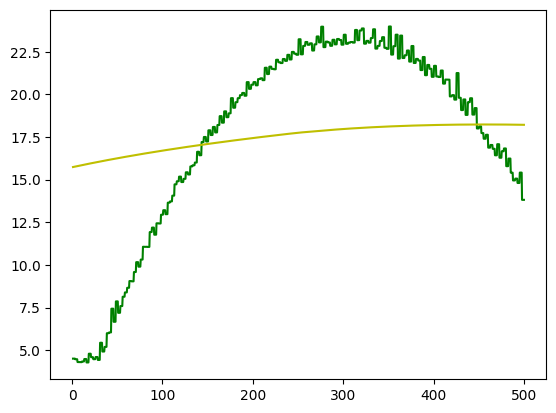

In [555]:
x=np.linspace(1,500, 1200)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
conv_points=np.log(np.convolve(np.asarray(points1),np.asarray(points1), "same"))
points2=conv_points
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+6])
    f1.append(points1[i:i+6])
    i+=6


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

f1_imag_cleaned = np.asarray(f1_imag)[:, 1:3]
x_train_imag = torch.tensor(f1_imag_cleaned)

y_train_real = torch.tensor(np.asarray(f2_real))
y_train_imag = torch.tensor(np.asarray(f2_imag))

m1_real=mogptk.LoadModel("first_real_compl_conv_custom2_1")
m2_real=mogptk.LoadModel('second_real_compl_conv_custom2_1')
m3_real=mogptk.LoadModel('third_real_compl_conv_custom2_1')
m4_real=mogptk.LoadModel('fourth_real_compl_conv_custom2_1')
m1_im=mogptk.LoadModel('first_im_compl_conv_custom2_1')
m2_im=mogptk.LoadModel('second_im_compl_conv_custom2_1')
m3_im=mogptk.LoadModel('third_im_compl_conv_custom2_1')
m4_im=mogptk.LoadModel('fourth_im_compl_conv_custom2_1')

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
x_points=x
plt.plot(x, values2, c="g")
plt.plot(x,points2, c="y")

plt.show()

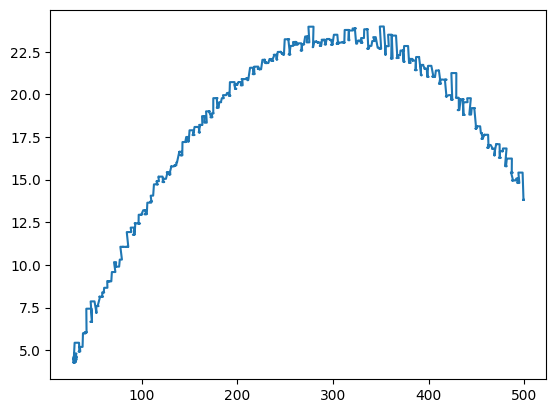

In [556]:
plt.plot(points1, values2)

In [566]:
n=np.asarray([1,2,3,4,5,6,7,7,8,10])
rfft(n)

array([53.         +0.j        , -5.        +13.48630465j,
       -3.38196601 +6.8819096j , -5.         +4.80828314j,
       -5.61803399 +1.62459848j, -5.         +0.j        ])

In [591]:
type(n)

numpy.ndarray

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[[0.0, -0.3032478902910266, -2.3016858501316824, 0.0], [0.0, 0.882350645692231, 2.4555167219659175, 0.0], [0.0, 1.6580171874473533, 0.24237171534444624, 0.0], [0.0, -2.2625585889931017, 1.4485184138765437, 0.0], [0.0, 1.5662568283145788, 2.0855335799788133, 0.0], [0.0, -2.1923527701735437, -0.9175595094306294, 0.0], [0.0, -1.2366962621662345, 2.1532680481180284, 0.0], [0.0, 0.49378503668408524, 0.019124576704723367, 0.0], [0.0, -3.4973044483489946, -1.2025332501772312, 0.0], [0.0, 0.5516129482745872, 2.510741091264495, 0.0]] imag


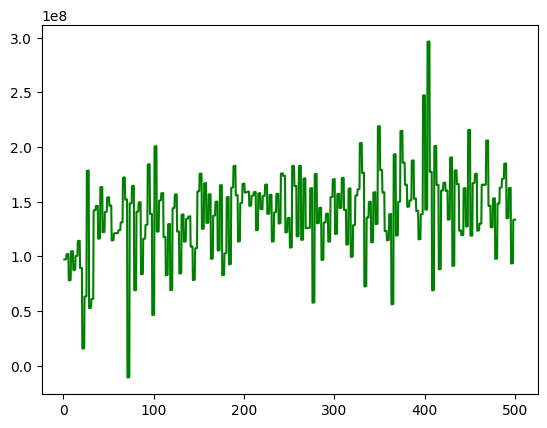

In [571]:
def func1(t):
    return torch.tensor([np.sin(t) + np.cos(t ** 2) + max(30, t)])


def func2(t):
    return torch.tensor((torch.tanh(((func1(t)) / 100) * 2) ))

x=np.linspace(1,500, 1200)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
#conv_points=np.log(np.convolve(np.asarray(points1),np.asarray(points1), "same"))
conv_points=points2
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+6])
    f1.append(points1[i:i+6])
    i+=6


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

f1_imag_cleaned = np.asarray(f1_imag)[:, 1:3]
x_train_imag = torch.tensor(f1_imag_cleaned)

y_train_real = torch.tensor(np.asarray(f2_real))
y_train_imag = torch.tensor(np.asarray(f2_imag))

m1_real=mogptk.LoadModel("first_real_compl_conv")
m2_real=mogptk.LoadModel('second_real_compl_conv')
m3_real=mogptk.LoadModel('third_real_compl_conv')
m4_real=mogptk.LoadModel('fourth_real_compl_conv')
m1_im=mogptk.LoadModel('first_im_compl_conv')
m2_im=mogptk.LoadModel('second_im_compl_conv')
m3_im=mogptk.LoadModel('third_im_compl_conv')
m4_im=mogptk.LoadModel('fourth_im_compl_conv')

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
x_points=x
plt.plot(x, values2, c="g")


plt.show()

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[[0.0, -0.3032478902910266, -2.3016858501316824, 0.0], [0.0, 0.882350645692231, 2.4555167219659175, 0.0], [0.0, 1.6580171874473533, 0.24237171534444624, 0.0], [0.0, -2.2625585889931017, 1.4485184138765437, 0.0], [0.0, 1.5662568283145788, 2.0855335799788133, 0.0], [0.0, -2.1923527701735437, -0.9175595094306294, 0.0], [0.0, -1.2366962621662345, 2.1532680481180284, 0.0], [0.0, 0.49378503668408524, 0.019124576704723367, 0.0], [0.0, -3.4973044483489946, -1.2025332501772312, 0.0], [0.0, 0.5516129482745872, 2.510741091264495, 0.0]] imag


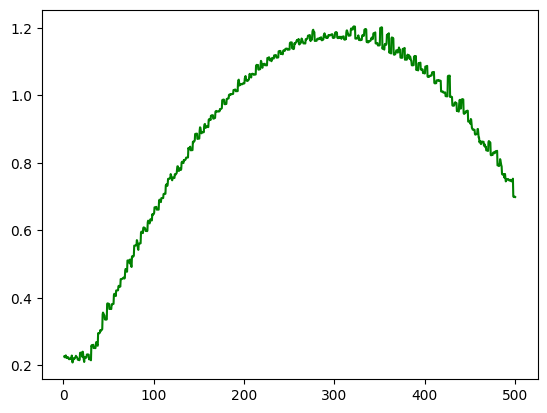

In [577]:
def func1(t):
    return torch.tensor([np.sin(t) + np.cos(t ** 2) + max(30, t)])


def func2(t):
    return torch.tensor((torch.tanh(((func1(t)) / 100) * 2) ))

x=np.linspace(1,500, 1200)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
#conv_points=np.log(np.convolve(np.asarray(points1),np.asarray(points1), "same"))
conv_points=points2
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+6])
    f1.append(points1[i:i+6])
    i+=6


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

f1_imag_cleaned = np.asarray(f1_imag)#[:, 1:3]
x_train_imag = torch.tensor(f1_imag_cleaned)

y_train_real = torch.tensor(np.asarray(f2_real))
y_train_imag = torch.tensor(np.asarray(f2_imag))

m1_real=mogptk.LoadModel("first_real_compl_conv_custom4")
m2_real=mogptk.LoadModel('second_real_compl_conv_custom4')
m3_real=mogptk.LoadModel('third_real_compl_conv_custom4')
m4_real=mogptk.LoadModel('fourth_real_compl_conv_custom4')
m1_im=mogptk.LoadModel('first_im_compl_conv_custom4')
m2_im=mogptk.LoadModel('second_im_compl_conv_custom4')
m3_im=mogptk.LoadModel('third_im_compl_conv_custom4')
m4_im=mogptk.LoadModel('fourth_im_compl_conv_custom4')

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)

_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
x_points=x
plt.plot(x, values2, c="g")


plt.show()

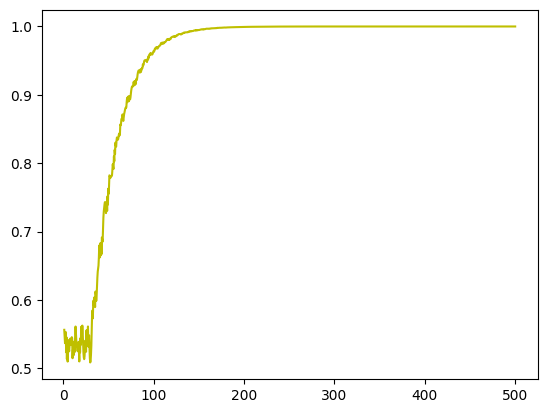

In [572]:
plt.plot(x, points2, c="y")

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


[[0.0, -0.5027134796697759, -3.785005814966797, 0.10714251649420592, 0.06348799593279747, 0.0], [0.0, 0.412039578319946, 0.7963287151879669, 0.7125685192548173, -3.046973215100996, 0.0], [0.0, 2.185333864205645, 1.2381723536502105, 1.288295982530462, -2.023761172899855, 0.0], [0.0, -4.439340607901968, -4.664802651618451, 0.06235754168012431, 0.3134942542276322, 0.0], [0.0, 1.9547588907711768, 1.3906726172906754, 0.8326673869706607, 0.3817207747006548, 0.0], [0.0, -2.098536848019943, -3.2405426636347463, -1.9457361564318352, -0.652477458186906, 0.0], [0.0, -0.3625306453305841, -0.7184666755692621, -2.126145646024891, 3.6902310753791676, 0.0], [0.0, 1.9607133304816762, 0.2038914384849625, -0.9250048267414309, 0.5815703268787209, 0.0], [0.0, -2.2103216349064083, 1.317841761858288, -1.6401118950328812, -1.0643823823716851, 0.0], [0.0, 6.096675301033557, 2.1060842729651372, 0.9388496475164315, 0.39765861544668235, 0.0]] imag


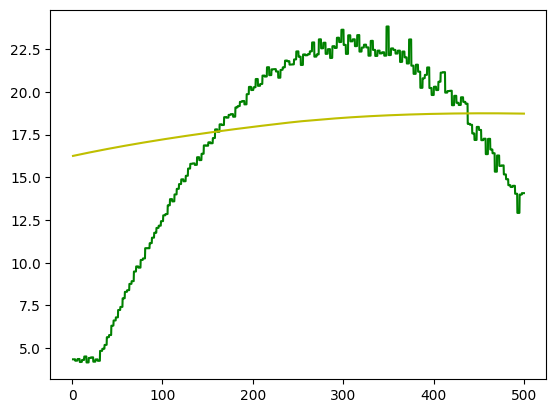

In [574]:
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
   # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))


x=np.linspace(1,500, 2000)
points1=[func1(i).numpy()[0] for i in x ]
points2=[func2(i).numpy()[0] for i in x]
conv_points=np.log(np.convolve(np.asarray(points1),np.asarray(points1), "same"))
points2=conv_points
f2=[]
f1=[]
i=0
while i< len(conv_points):
    f2.append(conv_points[i:i+10])
    f1.append(points1[i:i+10])
    i+=10


f1_real = []
f1_imag = []
f2_real = []
f2_imag = []
for i in range(200):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    f1_real.append([i.real for i in value1])
    f1_imag.append([i.imag for i in value1])

    f2_real.append([i.real for i in value2])
    f2_imag.append([i.imag for i in value2])

x_train_real = torch.tensor(np.asarray(f1_real))

print(f1_imag[:10],"imag")

f1_imag_cleaned = np.asarray(f1_imag)#[:, 1:3]
x_train_imag = torch.tensor(f1_imag_cleaned)

y_train_real = torch.tensor(np.asarray(f2_real))
y_train_imag = torch.tensor(np.asarray(f2_imag))

m1_real=mogptk.LoadModel("first_real_compl_conv_custom3")
m2_real=mogptk.LoadModel('second_real_compl_conv_custom3')
m3_real=mogptk.LoadModel('third_real_compl_conv_custom3')
m4_real=mogptk.LoadModel('fourth_real_compl_conv_custom3')
m5_real=mogptk.LoadModel('fifth_real_compl_conv_custom3')
m6_real=mogptk.LoadModel('sixth_real_compl_conv_custom3')
m1_im=mogptk.LoadModel('first_im_compl_conv_custom3')
m2_im=mogptk.LoadModel('second_im_compl_conv_custom3')
m3_im=mogptk.LoadModel('third_im_compl_conv_custom3')
m4_im=mogptk.LoadModel('fourth_im_compl_conv_custom3')
m5_im=mogptk.LoadModel('fifth_im_compl_conv_custom3')
m6_im=mogptk.LoadModel('sith_im_compl_conv_custom3')

_,real,_,_=m1_real.predict(x_train_real)
_,real2,_,_=m2_real.predict(x_train_real)
_,real3,_,_=m3_real.predict(x_train_real)
_,real4,_,_=m4_real.predict(x_train_real)
_,real5,_,_=m5_real.predict(x_train_real)
_,real6,_,_=m6_real.predict(x_train_real)


_,im1,_,_=m1_im.predict(x_train_imag)
_,im2,_,_=m2_im.predict(x_train_imag)
_,im3,_,_=m3_im.predict(x_train_imag)
_,im4,_,_=m4_im.predict(x_train_imag)
_,im5,_,_=m5_im.predict(x_train_imag)
_,im6,_,_=m6_im.predict(x_train_imag)

first=[]
second=[]
third=[]
fourth=[]
fifth=[]
sixth=[]
for r, im in zip(real,im1):
    first.append(r+1j*im)
for r, im in zip(real2,im2):
    second.append(r+1j*im)
for r, im in zip(real3,im3):
    third.append(r+1j*im) 
for r, im in zip(real4,im4):
    fourth.append(r+1j*im) 
    
for r, im in zip(real5,im5):
    fifth.append(r+1j*im)  
    
for r, im in zip(real6,im6):
    sixth.append(r+1j*im) 
result=[]    
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result=np.asarray(result) 

values=irfft(result,axis= 1)
x_train=np.asarray(x_train)
values2=values.flatten()
x_points=x_train.flatten()
x_points=x
plt.plot(x, values2, c="g")
plt.plot(x,points2, c="y")

plt.show()

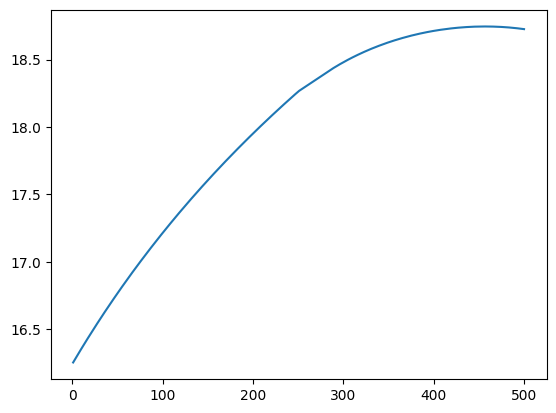

In [575]:
plt.plot(x, points2)

In [579]:
np.abs(5+1j*2)

5.385164807134504

In [581]:
np.sqrt(29)

5.385164807134504

In [595]:
a=[1+1j, 2+3j, 4+5j]
[i.real i.imag  for i in a]

SyntaxError: invalid syntax (2989358785.py, line 2)

In [598]:
s=np.asarray([[1,2,3,10], [4,5,6,11], [7,8,9,12], [10,11,12,13]])
s[:,1:3]

array([[ 2,  3],
       [ 5,  6],
       [ 8,  9],
       [11, 12]])

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[array([ 1.49398482,  1.47690344,  1.36108172,  1.50163591,  1.50738657,
        1.37165165,  1.348701  ,  1.52715826,  1.48594844,  1.52837634,
        1.41706002,  1.51782811,  1.61775494,  1.32147461,  1.47441554,
        1.53361642,  1.56801307,  1.42227221,  1.71176112,  1.98889923,
        1.92741287,  2.16498709,  2.54337358,  2.80917811,  2.62201548,
        3.10002041,  3.26167369,  3.46691322,  3.56495667,  3.96384573,
        4.2450633 ,  4.29460907,  4.60826731,  4.91649961,  5.26068592,
        5.28936577,  5.71724033,  6.44265461,  6.33476734,  6.44226074,
        6.95619297,  7.28640652,  7.52224064,  7.74795341,  8.3670578 ,
        8.66058922,  8.90012169,  9.070858  ,  9.86744881, 10.08463478,
       10.31437111, 10.57071495, 11.26918221, 11.57866669, 11.40736198,
       12.11922836, 12.94636154, 13.3751297 , 13.06155014, 14.01971054,
       14.11506271, 14.53950119, 14.81953049, 15.51566315, 15.78465271,
       16.06224823, 16.24281311, 17.00694275, 17.83100128, 17.8

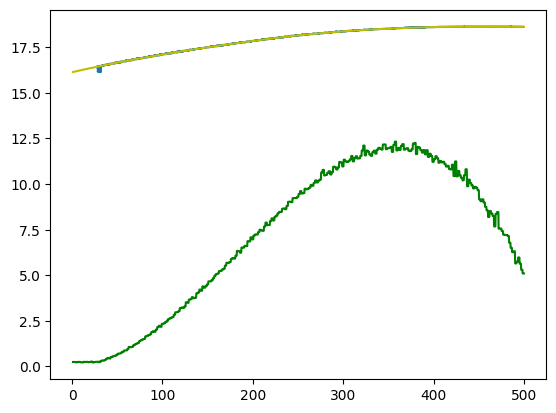

In [606]:
plt.plot(points1, points2)
x = np.linspace(1, 500, 1800)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
f2 = []
f1 = []
i = 0
while i < len(conv_points):
    f2.append(conv_points[i:i + 6])
    f1.append(points1[i:i + 6])
    i += 6

f1_real = []

f2_real = []

for i in range(300):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train=[]
    for i in value1:

        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2=[]
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

 

y_train_real = torch.tensor(np.asarray(f2_real))
 

m1_real = mogptk.LoadModel("LMC1")
m2_real = mogptk.LoadModel('LMC2')
m3_real = mogptk.LoadModel('LMC3')
m4_real = mogptk.LoadModel('LMC4')


_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)

print(real[:10], "real shape")
print(len(real), "length")
first = []
second = []
third = []
fourth = []
for r in range(len(real[0])):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(len(real2[0])): 
    second.append(real2[0][r] + 1j * real2[1][r])

for r in range(len(real3[0])):
    third.append(real3[0][r] + 1j * real3[1][r])
for r in range(len(real4[0])): 
    fourth.append(real4[0][r] + 1j * real4[1][r])
result = []
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result = np.asarray(result)

values = irfft(result, axis=1)
x_train = np.asarray(x_train)
values2 = values.flatten()
print(values2.shape, "shape")
x_points = x_train.flatten()
x_points = x
plt.plot(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

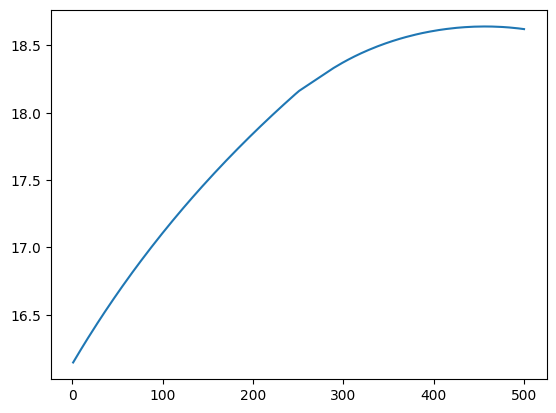

In [607]:
plt.plot(x, points2)

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[array([ 1.56962085,  1.53564954,  1.42794418,  1.5509584 ,  1.6180222 ,
        1.43892622,  1.3992033 ,  1.65034318,  1.58148026,  1.5096693 ,
        1.50635648,  1.61535621,  1.69210839,  1.37242424,  1.55323696,
        1.58899212,  1.57383013,  1.49426603,  1.8049202 ,  2.07975507,
        2.00419927,  2.24456549,  2.65263987,  2.82223558,  2.72312593,
        3.25601196,  3.38471794,  3.60172844,  3.71336174,  4.10375786,
        4.39109421,  4.48688889,  4.83530903,  5.10602474,  5.48457146,
        5.58369637,  5.93963432,  6.54517174,  6.62127304,  6.70593071,
        7.22197723,  7.57826996,  7.81624413,  7.96826744,  8.70970535,
        9.03849792,  9.25997162,  9.42840195, 10.43078232, 10.59702682,
       10.56774902, 10.97517014, 11.89454651, 12.0574913 , 11.8523941 ,
       12.64980316, 13.42260742, 13.70588684, 13.50325775, 14.66782379,
       14.65019226, 15.10860443, 15.30561066, 16.12630463, 16.56660461,
       16.68010712, 16.90603638, 17.69017792, 18.71903229, 18.4

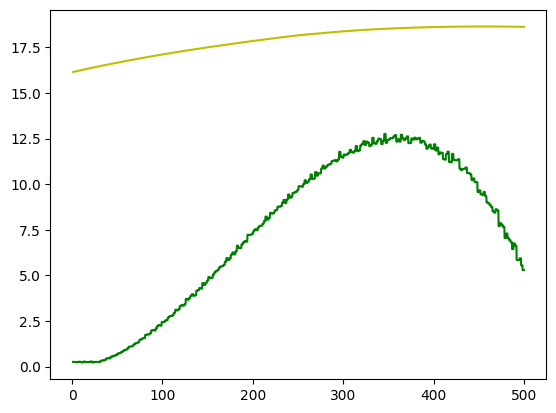

In [608]:
x = np.linspace(1, 500, 1800)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
f2 = []
f1 = []
i = 0
while i < len(conv_points):
    f2.append(conv_points[i:i + 6])
    f1.append(points1[i:i + 6])
    i += 6

f1_real = []

f2_real = []

for i in range(300):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train=[]
    for i in value1:

        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2=[]
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

 

y_train_real = torch.tensor(np.asarray(f2_real))
 

m1_real = mogptk.LoadModel("LMC1_2")
m2_real = mogptk.LoadModel('LMC2_2')
m3_real = mogptk.LoadModel('LMC3_2')
m4_real = mogptk.LoadModel('LMC4_2')


_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)

print(real[:10], "real shape")
print(len(real), "length")
first = []
second = []
third = []
fourth = []
for r in range(len(real[0])):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(len(real2[0])): 
    second.append(real2[0][r] + 1j * real2[1][r])

for r in range(len(real3[0])):
    third.append(real3[0][r] + 1j * real3[1][r])
for r in range(len(real4[0])): 
    fourth.append(real4[0][r] + 1j * real4[1][r])
result = []
for i in range(len(first)):
    result.append([first[i], second[i], third[i], fourth[i]])
result = np.asarray(result)

values = irfft(result, axis=1)
x_train = np.asarray(x_train)
values2 = values.flatten()
print(values2.shape, "shape")
x_points = x_train.flatten()
x_points = x
plt.plot(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

In [613]:
s=np.asarray([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
len(rfft(s))

11

In [612]:
s[20]

IndexError: index 20 is out of bounds for axis 0 with size 20

In [614]:
eps=0.1
len=400
def generate_samples(eps,len):
    step=eps*(1/len)
    points=[]
    for i in range(500):
        start=np.random.uniform(100,500,1)
        points.append(np.linspace(start, 12*step+start, 12))
    return np.asarray(points)    

In [615]:
points[:10]

[array([[252.13861103],
        [252.13888376],
        [252.13915648],
        [252.13942921],
        [252.13970194],
        [252.13997467],
        [252.14024739],
        [252.14052012],
        [252.14079285],
        [252.14106557],
        [252.1413383 ],
        [252.14161103]]),
 array([[298.11027844],
        [298.11055117],
        [298.1108239 ],
        [298.11109662],
        [298.11136935],
        [298.11164208],
        [298.1119148 ],
        [298.11218753],
        [298.11246026],
        [298.11273299],
        [298.11300571],
        [298.11327844]]),
 array([[461.51044624],
        [461.51071897],
        [461.51099169],
        [461.51126442],
        [461.51153715],
        [461.51180987],
        [461.5120826 ],
        [461.51235533],
        [461.51262806],
        [461.51290078],
        [461.51317351],
        [461.51344624]]),
 array([[339.84480927],
        [339.84508199],
        [339.84535472],
        [339.84562745],
        [339.84590018],
        [3

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(429,)


C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


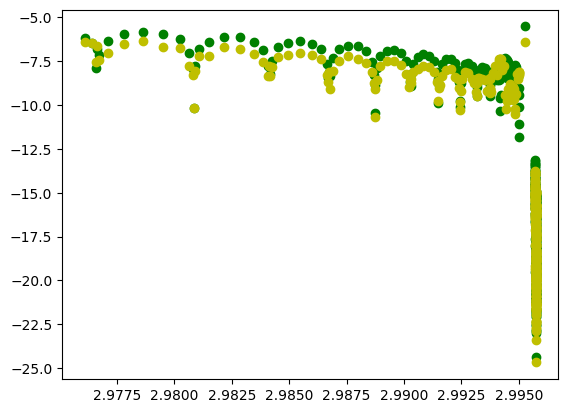

In [636]:
# testing correlation between frequencies
points2 = np.asarray([func2(i).numpy()[0] for i in x])
points=[]
while i in range(9000):
    points.append(points2[i:i + 20])
   
    i += 20
points=np.asarray(points)    
print(points.shape)
first=[]
second=[]
third=[]
fourth=[]
fifth=[]
for i in range(428):
    value1 = rfft(points[i])
    first.append(value1[0])
    second.append(value1[1])
    third.append(value1[2])
    fourth.append(value1[3])
    fifth.append(value1[4])
    
plt.scatter(np.log(first), np.log(second), c="g")    
plt.scatter(np.log(first), np.log(third), c="y")

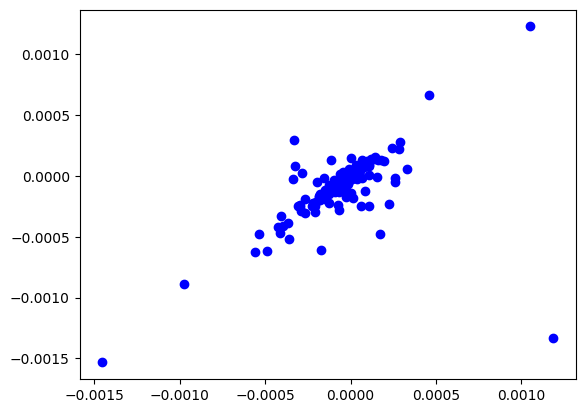

In [629]:
plt.scatter(second,third, c="b")

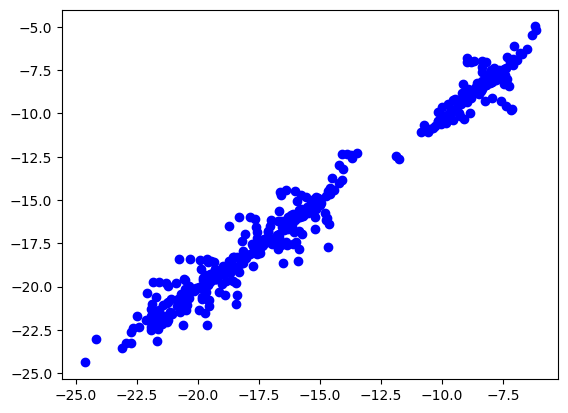

In [635]:
plt.scatter(np.log(fourth), np.log(fifth), c="b")

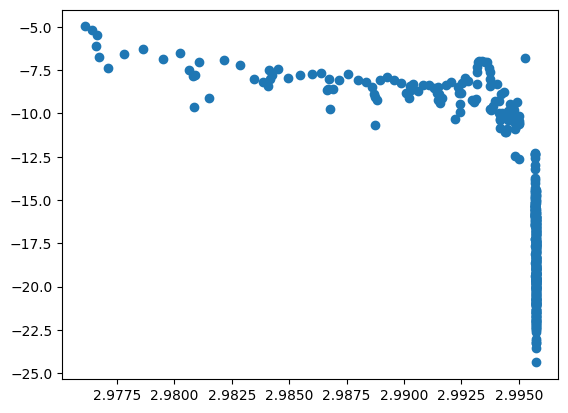

In [634]:
plt.scatter(np.log(first), np.log(fifth))

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


6000
(300,) shape
(6000,) shape


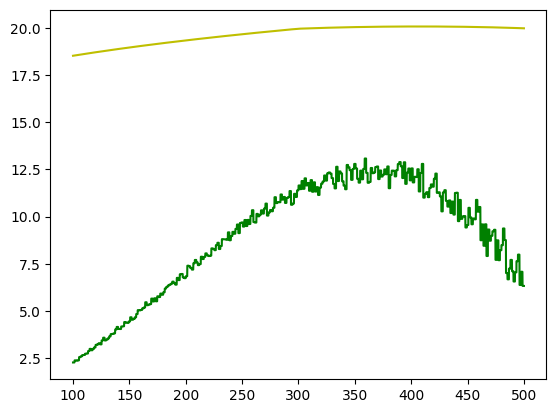

In [649]:
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
   # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))
x = np.linspace(100, 500, 6000)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
print(conv_points.shape[0])
f2 = []
f1 = []
i = 0
while i < conv_points.shape[0]:
    f2.append(conv_points[i:i + 20])
    f1.append(points1[i:i + 20])
    i += 20

f1_real = []

f2_real = []

for i in range(300):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []
    for i in value1:
        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2 = []
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

y_train_real = torch.tensor(np.asarray(f2_real))

m1_real = mogptk.LoadModel("LMC1_20")
m2_real = mogptk.LoadModel('LMC2_20')
m3_real = mogptk.LoadModel('LMC3_20')
m4_real = mogptk.LoadModel('LMC4_20')
m5_real = mogptk.LoadModel('LMC5_20')
m6_real = mogptk.LoadModel('LMC6_20')
m7_real = mogptk.LoadModel('LMC7_20')
m8_real = mogptk.LoadModel('LMC8_20')
m9_real = mogptk.LoadModel('LMC9_20')
m10_real = mogptk.LoadModel('LMC10_20')
m11_real = mogptk.LoadModel('LMC11_20')

_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)
_, real7, _, _ = m7_real.predict(x_train_real)
_, real8, _, _ = m8_real.predict(x_train_real)
_, real9, _, _ = m9_real.predict(x_train_real)
_, real10, _, _ = m10_real.predict(x_train_real)
_, real11, _, _ = m11_real.predict(x_train_real)



first = []
second = []
third = []
fourth = []
fifth = []
sixth = []
seventh = []
eigths = []
nigth = []
tenth = []
eleven = []
print(real[0].shape, "shape")

for r in range(300):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(300):
    second.append(real2[0][r] + 1j * real2[1][r])

for r in range(300):
    third.append(real3[0][r] + 1j * real3[1][r])
for r in range(300):
    fourth.append(real4[0][r] + 1j * real4[1][r])
for r in range(300):
    fifth.append(real5[0][r] + 1j * real5[1][r])
for r in range(300):
    sixth.append(real6[0][r] + 1j * real6[1][r])  
for r in range(300):
    seventh.append(real7[0][r] + 1j * real7[1][r])
for r in range(300):
    eigths.append(real8[0][r] + 1j * real8[1][r])
for r in range(300):
    nigth.append(real9[0][r] + 1j * real9[1][r])   
for r in range(300):
    tenth.append(real10[0][r] + 1j * real10[1][r])
for r in range(300):
    eleven.append(real11[0][r] + 1j * real11[1][r])   
    
    
result = []
for i in range(300):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i], seventh[i],
                  eigths[i], nigth[i],tenth[i], eleven[i]])
result = np.asarray(result)

values = irfft(result, axis=1)
x_train = np.asarray(x_train)
values2 = values.flatten()
print(values2.shape, "shape")
x_points = x_train.flatten()
x_points = x
plt.plot(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

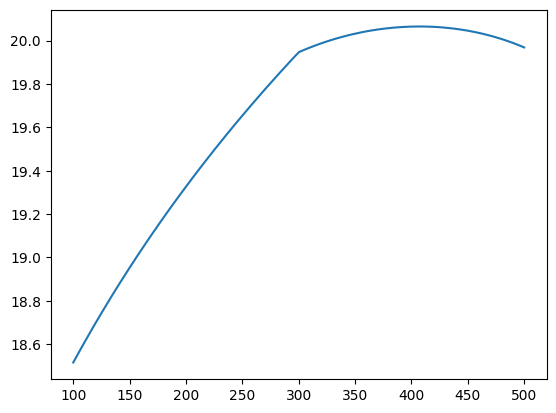

In [647]:
plt.plot(x, points2)

In [648]:
s=np.asarray([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
   26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50])
rfft(s)

array([1275.  +0.j        ,  -25.+397.3636211j ,  -25.+197.89537721j,
        -25.+131.05458953j,  -25. +97.36857137j,  -25. +76.94208843j,
        -25. +63.14279224j,  -25. +53.12770433j,  -25. +45.47483118j,
        -25. +39.3936965j ,  -25. +34.40954801j,  -25. +30.21980876j,
        -25. +26.62229601j,  -25. +23.47656265j,  -25. +20.68179865j,
        -25. +18.1635632j ,  -25. +15.86548244j,  -25. +13.7438663j ,
        -25. +11.76410703j,  -25.  +9.89820022j,  -25.  +8.12299241j,
        -25.  +6.41890901j,  -25.  +4.76900506j,  -25.  +3.15823446j,
        -25.  +1.57286668j,  -25.  +0.j        ])

In [650]:
i=0
s[i:i+5]

array([1, 2, 3, 4, 5])

In [653]:
def generate_points(start,stop,num_points,subsequence):
    eps = 0.1
    len = stop-start

    step = eps * (1 / len)
    points_x = []

    for i in range(num_points):
            start = np.random.uniform(start, stop, 1)
            x=np.linspace(start, subsequence * step + start, subsequence)
            for i in x:
                points_x.append(i)
    return np.asarray(points_x)
x=generate_points(300,500,700,50)

In [654]:
x.shape

(35000, 1)

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


6000
[array([11.5844319 ,  5.44065285,  7.38178706, 13.08005855, 10.71701744,
        5.25250415,  7.47283749, 12.84597305, 11.10216449,  5.65579512,
        6.44614361, 11.89842746, 12.34191304,  7.26512055,  5.13628149,
        9.3296146 , 12.96108408, 10.5420611 ,  5.87573602,  5.89423222,
       10.38576504, 12.94920973, 10.29039358,  6.06156114,  5.73480484,
        9.52184921, 12.70771675, 11.71979456,  7.85438968,  5.49299905,
        7.073055  , 10.76569465, 12.85303117, 11.52225016,  8.22543355,
        5.89090512,  6.54883002,  9.45352844, 12.21862385, 12.77437905,
       10.92702819,  8.1401164 ,  6.30132294,  6.54412389,  8.5197585 ,
       10.9846418 , 12.61879399, 12.57440541, 11.08749394,  8.95402311,
        7.19094425,  6.48373274,  7.04310489,  8.45348907, 10.22039633,
       11.68145757, 12.47237732, 12.4108651 , 11.61852979, 10.37546853,
        9.07223083,  7.88712854,  7.11753439,  6.82280231,  6.90056852,
        7.36588926,  8.07805114,  8.83966355,  9.58814783,

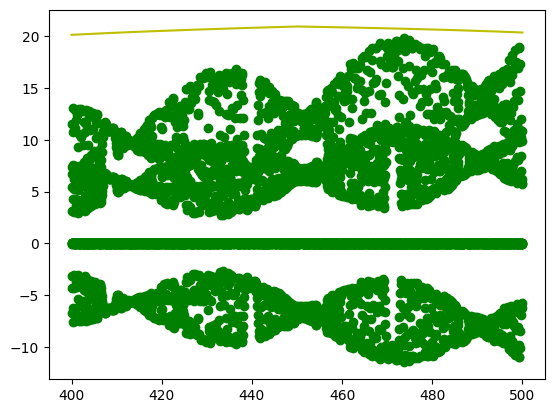

In [8]:
import mogptk
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
   # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))
x = np.linspace(400, 500, 6000)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
print(conv_points.shape[0])
f2 = []
f1 = []
i = 0
while i < conv_points.shape[0]:
    f2.append(conv_points[i:i + 6])
    f1.append(points1[i:i + 6])
    i += 6

f1_real = []

f2_real = []

for i in range(1000):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []
    for i in value1:
        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2 = []
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

y_train_real = torch.tensor(np.asarray(f2_real))

m1_real = mogptk.LoadModel("LMC_6_full")


_, real, _, _ = m1_real.predict(x_train_real)




first = []
second = []
third = []
fourth = []


print(real[:10], "shape")

for r in range(1000):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(1000):
    second.append(real[2][r] + 1j * real[3][r])

for r in range(1000):
    third.append(real[4][r] + 1j * real[5][r])
for r in range(1000):
    fourth.append(real[6][r] + 1j * real[7][r])
  
    
    
result = []
for i in range(1000):
    result.append([first[i], second[i], third[i], fourth[i]])
result = np.asarray(result)

values = irfft(result, axis=1)

values2 = values.flatten()
print(values2.shape, "shape")

plt.scatter(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

In [9]:
s=np.asarray([1,2,3,4,5,6,7,8,9,10])
rfft(s)

array([55. +0.j        , -5.+15.38841769j, -5. +6.8819096j ,
       -5. +3.63271264j, -5. +1.62459848j, -5. +0.j        ])

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


6000
[array([ 66.28747559,  66.38061523,  66.21936035,  66.69519043,
        67.06359863,  66.25012207,  66.3581543 ,  67.92016602,
        67.16503906,  65.88378906,  68.2845459 ,  68.20019531,
        65.65795898,  68.88244629,  68.52746582,  65.5369873 ,
        70.26843262,  67.26037598,  66.72949219,  71.09631348,
        64.80126953,  70.84460449,  67.09912109,  67.59387207,
        70.51452637,  64.71875   ,  72.58349609,  63.3737793 ,
        73.30578613,  62.95263672,  73.56872559,  62.61401367,
        74.01428223,  62.04333496,  74.61694336,  61.83557129,
        74.23791504,  63.6081543 ,  70.96569824,  69.02319336,
        64.45593262,  75.75891113,  60.62451172,  74.8704834 ,
        68.28027344,  63.50378418,  78.34509277,  62.88220215,
        67.8984375 ,  78.59594727,  61.53137207,  68.29772949,
        80.10205078,  63.65490723,  63.5802002 ,  80.62988281,
        72.35705566,  58.55859375,  70.79248047,  82.51647949,
        69.82885742,  57.73303223,  68.10192871, 

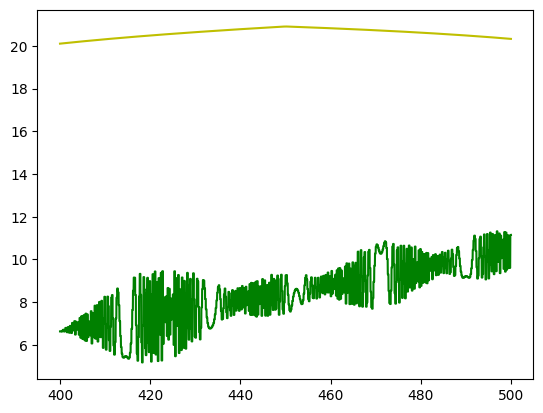

In [15]:
import mogptk
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
   # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))
x = np.linspace(400, 500, 6000)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
print(conv_points.shape[0])
f2 = []
f1 = []
i = 0
while i < conv_points.shape[0]:
    f2.append(conv_points[i:i + 10])
    f1.append(points1[i:i + 10])
    i += 10

f1_real = []

f2_real = []

for i in range(600):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []
    for i in value1:
        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2 = []
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

y_train_real = torch.tensor(np.asarray(f2_real))

m1_real = mogptk.LoadModel("LMC1_10_const3")
m2_real = mogptk.LoadModel('LMC2_10_const3')
m3_real = mogptk.LoadModel('LMC3_10_const3')
m4_real = mogptk.LoadModel('LMC4_10_const3')
m5_real = mogptk.LoadModel('LMC5_10_const3')
m6_real = mogptk.LoadModel('LMC6_10_const3')


_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)


first = []
second = []
third = []
fourth = []
fifth=[]
sixth=[]

print(real[:10], "shape")

for r in range(600):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(600):
    second.append(real2[0][r] + 1j * real2[1][r])

for r in range(600):
    third.append(real3[0][r] + 1j * real3[1][r])
for r in range(600):
    fourth.append(real4[0][r] + 1j * real4[1][r])
    
for r in range(600):
    fifth.append(real5[0][r] + 1j * real5[1][r])
for r in range(600):
    sixth.append(real6[0][r] + 1j * real6[1][r]) 
    
    
result = []
for i in range(600):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result = np.asarray(result)

values = irfft(result, axis=1)

values2 = values.flatten()
print(values2.shape, "shape")

plt.plot(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

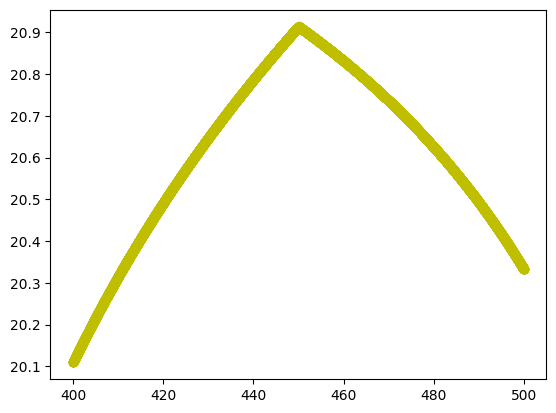

In [17]:
plt.scatter(x, points2, c="y")

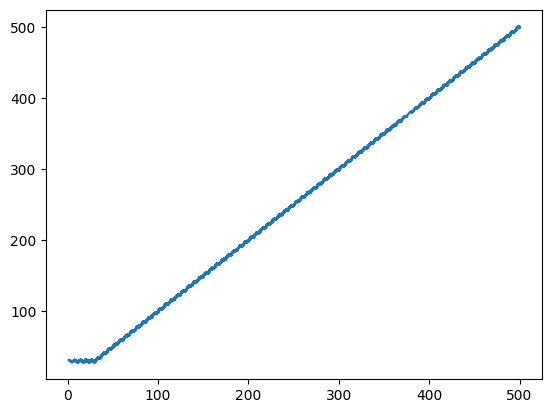

In [24]:
x = np.linspace(1, 500, 60000)
points1 = [func1(i).numpy()[0] for i in x]
plt.plot(x,points1)

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


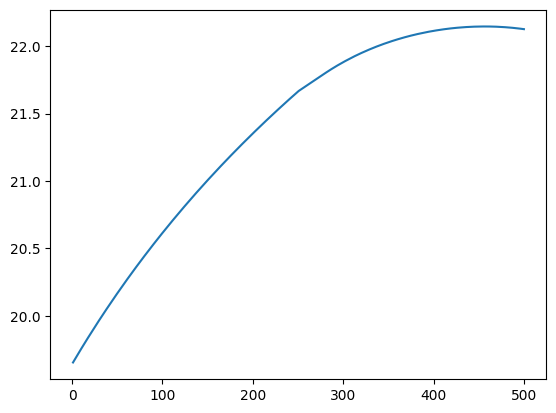

In [27]:
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
plt.plot(x, points2)

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


6000
[array([ 2.04022102e-01,  2.18088350e-01,  3.04016211e+00,  2.75043915e+00,
        3.45698204e+00, -9.47633158e-01,  1.07805305e+00,  2.73682576e-01,
        9.24552484e-05, -2.16535590e+00,  2.26566916e+00, -4.46317068e-01,
        3.12885889e-01,  7.94939884e-01, -7.57495500e-01,  1.27065813e+00,
        3.77722125e-01,  5.52781627e-02, -3.76845817e-01,  1.33451008e+00,
        7.50307847e-02,  4.05818770e-01,  6.75679634e-01, -6.70559386e-01,
        1.06642102e+00,  2.69832174e-01,  3.96014193e-01, -3.85785826e-01,
        1.20139194e+00, -3.95046659e-01,  2.98154881e-01,  1.26037615e+00,
        4.25401678e-01,  4.55534209e-01, -1.47742858e+00, -3.26623507e-01,
        9.76535123e-01, -1.59060546e+00,  2.12492661e+00,  4.29340465e+00,
        3.50263322e+00, -8.73578732e-01,  1.45130660e+00,  5.70608760e-01,
        7.45807434e-01, -1.03055986e-01,  2.58953460e+00, -1.57722191e+00,
       -3.62865965e+00, -3.52948783e+00,  2.02342616e+00,  7.48519145e-01,
        5.95775926e

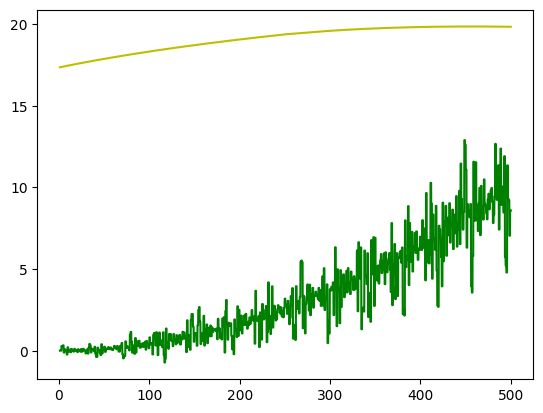

In [28]:
import mogptk
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
   # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))
x = np.linspace(1, 500, 6000)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
print(conv_points.shape[0])
f2 = []
f1 = []
i = 0
while i < conv_points.shape[0]:
    f2.append(conv_points[i:i + 10])
    f1.append(points1[i:i + 10])
    i += 10

f1_real = []

f2_real = []

for i in range(600):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []
    for i in value1:
        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2 = []
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

y_train_real = torch.tensor(np.asarray(f2_real))

m1_real = mogptk.LoadModel("LMC1_10_const4")
m2_real = mogptk.LoadModel('LMC2_10_const4')
m3_real = mogptk.LoadModel('LMC3_10_const4')
m4_real = mogptk.LoadModel('LMC4_10_const4')
m5_real = mogptk.LoadModel('LMC5_10_const4')
m6_real = mogptk.LoadModel('LMC6_10_const4')


_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)


first = []
second = []
third = []
fourth = []
fifth=[]
sixth=[]

print(real[:10], "shape")

for r in range(600):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(600):
    second.append(real2[0][r] + 1j * real2[1][r])

for r in range(600):
    third.append(real3[0][r] + 1j * real3[1][r])
for r in range(600):
    fourth.append(real4[0][r] + 1j * real4[1][r])
    
for r in range(600):
    fifth.append(real5[0][r] + 1j * real5[1][r])
for r in range(600):
    sixth.append(real6[0][r] + 1j * real6[1][r]) 
    
    
result = []
for i in range(600):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result = np.asarray(result)

values = irfft(result, axis=1)

values2 = values.flatten()
print(values2.shape, "shape")

plt.plot(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


6000
[array([-3.87872801e+01,  4.97697687e+01, -2.91543810e+01, -4.51740914e+01,
       -1.02636166e+00,  2.40946469e+01,  1.53845313e+01,  1.09005896e+01,
       -1.54272526e+01, -1.84301392e+01, -2.22484640e+00,  1.45681231e+01,
        1.19759706e+00,  1.95532374e+01,  2.87556241e+01, -7.31243172e+00,
        1.66055658e+01,  2.39211798e+00, -5.51357326e+00, -8.38367600e+00,
        4.70788571e+01,  2.62804205e+01,  3.89665552e+01,  1.87150440e+01,
       -2.70168957e+01,  4.48410770e-01,  1.81130631e+01,  1.87922759e+01,
        3.80395819e+00,  3.01947631e+01, -8.50612946e+00, -1.57112007e+01,
        2.25042237e+01, -4.40430002e+01,  1.35970985e-01,  3.54818947e+01,
        4.28443639e+01,  3.64755566e+01, -2.16599417e-01,  5.06779736e+00,
       -2.71824656e+01, -4.65327775e+01,  7.17944800e+01,  5.86857518e+01,
        4.90488810e+01, -5.62720426e+00,  4.53803438e+01, -6.67413822e+01,
        1.43929532e+01,  1.71842580e+01,  1.86088202e+01,  6.15486176e+01,
        4.81464597e

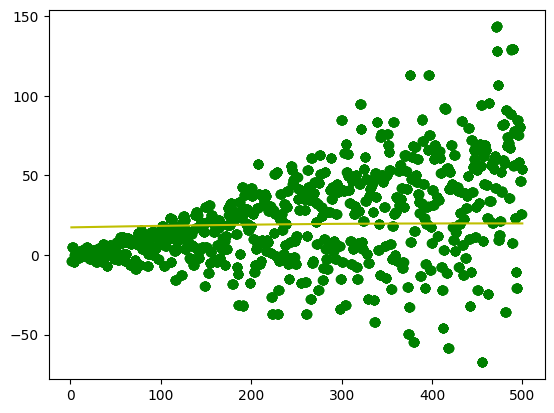

In [30]:
import mogptk
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
   # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))
x = np.linspace(1, 500, 6000)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
conv_points = np.log(np.convolve(np.asarray(points1), np.asarray(points1), "same"))
points2 = conv_points
print(conv_points.shape[0])
f2 = []
f1 = []
i = 0
while i < conv_points.shape[0]:
    f2.append(conv_points[i:i + 10])
    f1.append(points1[i:i + 10])
    i += 10

f1_real = []

f2_real = []

for i in range(600):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []
    for i in value1:
        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2 = []
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

y_train_real = torch.tensor(np.asarray(f2_real))

m1_real = mogptk.LoadModel("LMC1_10_const5")
m2_real = mogptk.LoadModel('LMC2_10_const5')
m3_real = mogptk.LoadModel('LMC3_10_const5')
m4_real = mogptk.LoadModel('LMC4_10_const5')
m5_real = mogptk.LoadModel('LMC5_10_const5')
m6_real = mogptk.LoadModel('LMC6_10_const5')


_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)


first = []
second = []
third = []
fourth = []
fifth=[]
sixth=[]

print(real[:10], "shape")

for r in range(600):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(600):
    second.append(real2[0][r] + 1j * real2[1][r])

for r in range(600):
    third.append(real3[0][r] + 1j * real3[1][r])
for r in range(600):
    fourth.append(real4[0][r] + 1j * real4[1][r])
    
for r in range(600):
    fifth.append(real5[0][r] + 1j * real5[1][r])
for r in range(600):
    sixth.append(real6[0][r] + 1j * real6[1][r]) 
    
    
result = []
for i in range(600):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result = np.asarray(result)

values = irfft(result, axis=1)

values2 = values.flatten()
print(values2.shape, "shape")

plt.scatter(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

C:\Users\anast\PycharmProjects\Spectral_Mixture\.venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


6000
[array([2.43836403e-01, 8.87180901e+00, 1.87541199e+00, 2.71854591e+00,
       4.74831963e+00, 4.13221169e+00, 6.63841915e+00, 7.31149101e+00,
       4.19310951e+00, 3.13806629e+00, 2.96969986e+00, 3.86155415e+00,
       3.34075451e+00, 6.54216480e+00, 7.05342674e+00, 2.44682503e+00,
       3.31071854e+00, 3.41308498e+00, 2.63420868e+00, 2.45830441e+00,
       1.06775389e+01, 3.80489922e+00, 9.20082188e+00, 4.15939140e+00,
       2.44643974e+00, 3.36205959e+00, 3.69905853e+00, 4.77436924e+00,
       5.72504807e+00, 7.04170704e+00, 2.30185890e+00, 2.45322418e+00,
       4.19368744e+00, 2.12711811e+00, 4.02409649e+00, 7.56205177e+00,
       1.32908030e+01, 6.66482544e+00, 4.44136429e+00, 5.26186848e+00,
       2.00820827e+00, 5.33841133e-01, 1.37327394e+01, 9.87876701e+00,
       7.99419022e+00, 1.36215973e+00, 8.25911140e+00, 9.09826279e-01,
       4.59213257e+00, 4.89147186e+00, 7.81984329e+00, 8.62041092e+00,
       1.20748959e+01, 1.11737576e+01, 6.57334709e+00, 5.71754074e+00,


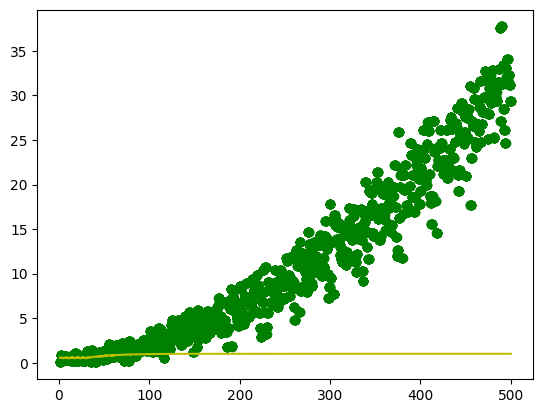

In [38]:
import mogptk
def func1(t):
    return torch.tensor([np.sin(t)+ np.cos(t**2)+ max(30,t) ])

def func2(t):
 
    # return torch.tensor((torch.tanh( ((func1(t))/100)*2)*  t) )
   return torch.tensor(torch.tanh( ((func1(t))/100)*2))
x = np.linspace(1, 500, 6000)
points1 = [func1(i).numpy()[0] for i in x]
points2 = [func2(i).numpy()[0] for i in x]
#conv_points = (np.convolve(np.asarray(points1), np.asarray(points1), "same"))
#points2 = conv_points
print(conv_points.shape[0])
f2 = []
f1 = []
i = 0
while i < conv_points.shape[0]:
    f2.append(conv_points[i:i + 10])
    f1.append(points1[i:i + 10])
    i += 10

f1_real = []

f2_real = []

for i in range(600):
    value1 = rfft(f1[i])
    value2 = rfft(f2[i])
    real_train = []
    for i in value1:
        real_train.append(i.real)
        real_train.append(i.imag)
    f1_real.append(real_train)
    real_train2 = []
    for i in value2:
        real_train2.append(i.real)
        real_train2.append(i.imag)
    f2_real.append(real_train2)

x_train_real = torch.tensor(np.asarray(f1_real))

y_train_real = torch.tensor(np.asarray(f2_real))

m1_real = mogptk.LoadModel("LMC1_10_const6")
m2_real = mogptk.LoadModel('LMC2_10_const6')
m3_real = mogptk.LoadModel('LMC3_10_const6')
m4_real = mogptk.LoadModel('LMC4_10_const6')
m5_real = mogptk.LoadModel('LMC5_10_const6')
m6_real = mogptk.LoadModel('LMC6_10_const6')


_, real, _, _ = m1_real.predict(x_train_real)
_, real2, _, _ = m2_real.predict(x_train_real)
_, real3, _, _ = m3_real.predict(x_train_real)
_, real4, _, _ = m4_real.predict(x_train_real)
_, real5, _, _ = m5_real.predict(x_train_real)
_, real6, _, _ = m6_real.predict(x_train_real)


first = []
second = []
third = []
fourth = []
fifth=[]
sixth=[]

print(real[:10], "shape")

for r in range(600):
    first.append(real[0][r] + 1j * real[1][r])
for r in range(600):
    second.append(real2[0][r] + 1j * real2[1][r])

for r in range(600):
    third.append(real3[0][r] + 1j * real3[1][r])
for r in range(600):
    fourth.append(real4[0][r] + 1j * real4[1][r])
    
for r in range(600):
    fifth.append(real5[0][r] + 1j * real5[1][r])
for r in range(600):
    sixth.append(real6[0][r] + 1j * real6[1][r]) 
    
    
result = []
for i in range(600):
    result.append([first[i], second[i], third[i], fourth[i], fifth[i], sixth[i]])
result = np.asarray(result)

values = irfft(result, axis=1)

values2 = values.flatten()
print(values2.shape, "shape")

plt.scatter(x, values2, c="g")
plt.plot(x, points2, c="y")

plt.show()

In [39]:
training_data=np.asarray(points2)
print(value1[2])
print(value2[2])

(0.8322926120038576-3.9155322625735836j)
(150876.99704813515-208222.85827568214j)


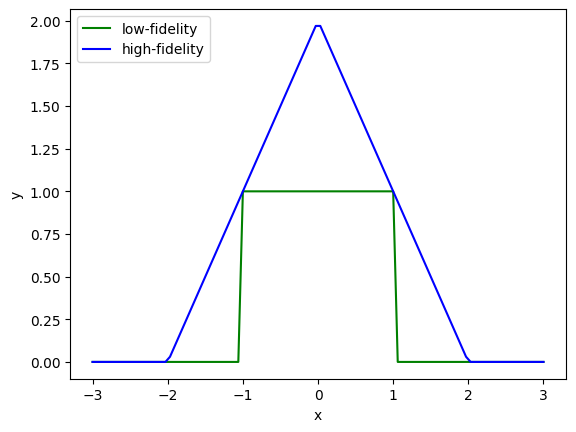

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def low_fidelity(x):
    if np.abs(x)<=1:
        return 1
    else:
        return 0
    
def high_fidelity(x):
    if x<-2 or x>2:
        return 0
    if x>-2 and x<0:
        return 2+x
    if x>0 and x<2:
        return 2-x
    
x = np.linspace(-3, 3, 100)
points1 = [low_fidelity(i) for i in x]
points2 = [high_fidelity(i) for i in x]
plt.plot(x, points1, c="g", label="low-fidelity")
plt.plot(x, points2, c="b", label="high-fidelity")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.savefig("badfcts.jpeg")

In [446]:
+pp=np.convolve(points1, points1, "full")

In [447]:
pp.shape

(199,)

In [453]:
x=np.linspace(-9,9, 198)
points2 = [high_fidelity(i) for i in x]
freq2=rfft(points2)

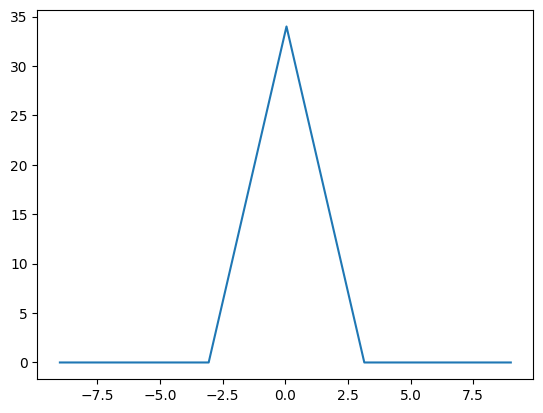

In [454]:
plt.plot(np.linspace(-9, 9, 198), pp[:198])

In [455]:
rfft(pp[:198])

array([ 1.15600000e+03+0.00000000e+00j, -1.04820924e+03+3.90798505e-14j,
        7.71818360e+02-3.19744231e-14j, -4.40688560e+02+1.77635684e-15j,
        1.72319810e+02-2.38697950e-14j, -2.94119942e+01-2.10942375e-14j,
        1.00000000e+00+1.11417993e-14j, -2.86151211e+01-2.16889180e-14j,
        5.30859891e+01-2.48371116e-14j, -4.83741501e+01+1.77635684e-15j,
        2.41304554e+01-5.55111512e-15j, -3.87938524e+00+5.55111512e-17j,
        1.00000000e+00-2.69229083e-15j, -1.05989445e+01+3.10862447e-14j,
        1.87865617e+01-3.46070742e-14j, -1.69913468e+01+1.73678777e-15j,
        8.05280180e+00-3.67967807e-15j, -8.88280910e-01-2.71193229e-15j,
        1.00000000e+00-1.05086943e-15j, -6.12085431e+00-8.17209580e-15j,
        9.83983460e+00+3.34661116e-15j, -8.34811372e+00+3.29520880e-17j,
        3.53208889e+00+2.77555756e-17j, -1.96002804e-01-2.23767576e-14j,
        1.00000000e+00+3.94157788e-15j, -4.24243644e+00-2.53928776e-16j,
        6.14459601e+00-2.16493490e-15j, -4.79476228

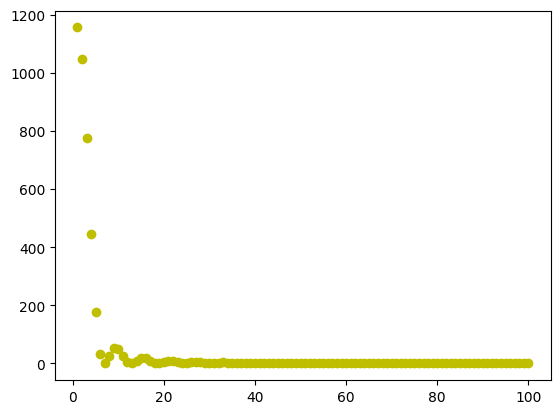

In [458]:
plt.scatter(np.linspace(1,100,100),np.abs(rfft(pp)),c="y")
#plt.plot(np.linspace(1,100,100), np.abs(freq2),c="g")

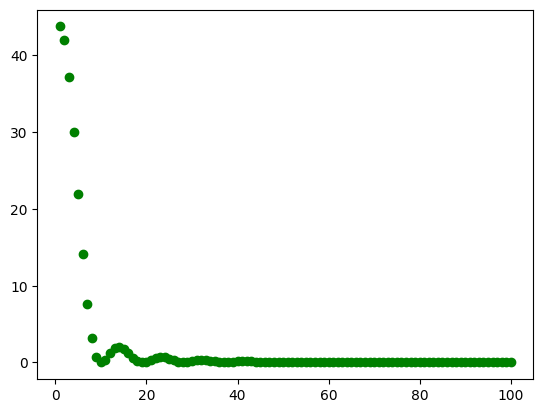

In [459]:
plt.scatter(np.linspace(1,100,100), np.abs(freq2),c="g")

plt.plot(np.linspace(-9,9, 198), irfft(freq2))

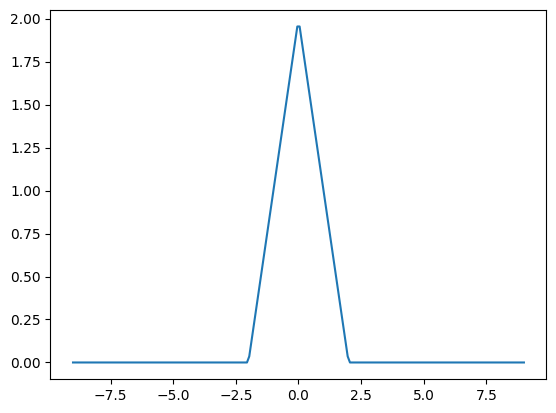

In [460]:
plt.plot(np.linspace(-9,9, 198), irfft(freq2))

In [428]:
from scipy.fft import irfft, rfft,fft,ifft

In [429]:
freq1=fft(points1)
square=[i**2 for i in freq1]
points_trinagle=ifft(square)

In [461]:
def func3(x):
    return np.sin(np.pi*x)

x = np.linspace(-3, 3, 100)
points1 = [func3(i) for i in x]
pp2=np.convolve(points1, points1, "full")
pp2.shape

(199,)

In [465]:
frew=rfft(pp2[:199])
frew2=rfft(points1)

In [466]:
print(frew.shape)
print(frew2.shape)

(100,)
(51,)


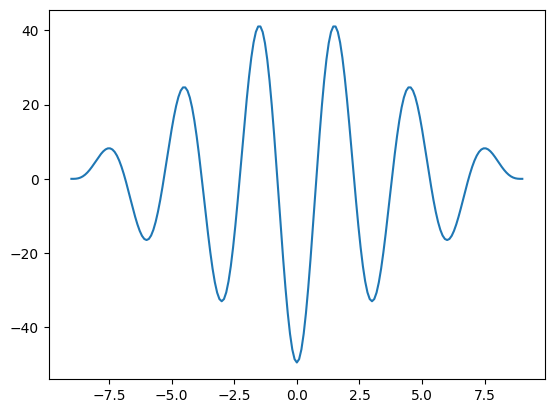

In [476]:
plt.plot(np.linspace(-9,9,199), pp2)

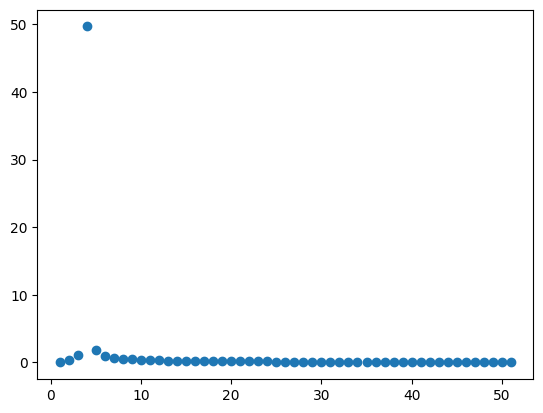

In [468]:
plt.scatter(np.linspace(1, 51,51), np.abs(frew2))

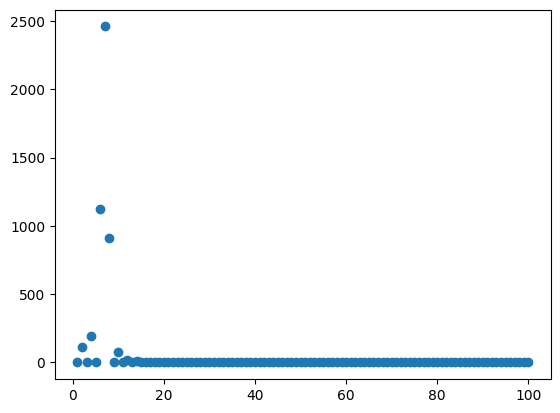

In [469]:
plt.scatter(np.linspace(1,100,100), np.abs(frew))

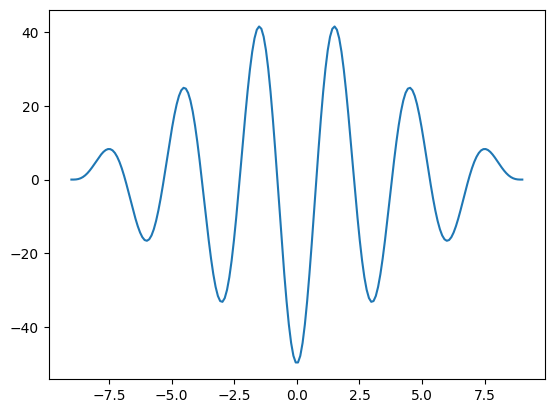

In [472]:
plt.plot(np.linspace(-9,9, 198), irfft(frew))

In [473]:
x=np.linspace(-5,-2.5,15)

In [474]:
def func3(x):
    return np.sin(np.pi*x)


points1 = [func3(i) for i in x]

In [475]:
points_test=pp2[65:75]

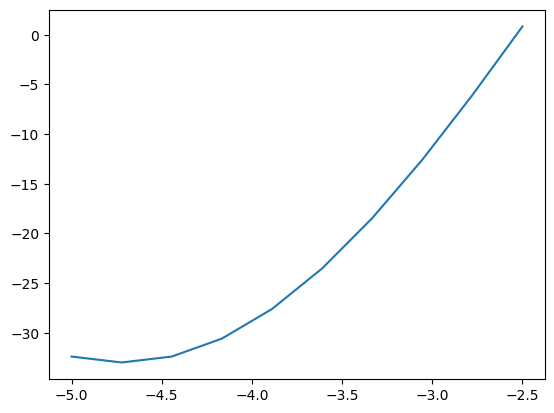

In [477]:
plt.plot(np.linspace(-5,-2.5,10),points_test)

In [478]:
pr=rfft(points_test)

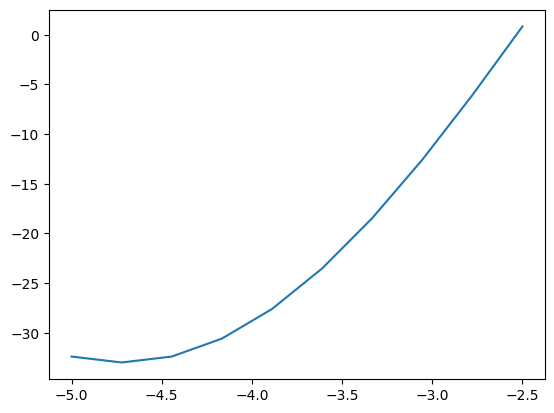

In [479]:
plt.plot(np.linspace(-5,-2.5,10),irfft(pr))

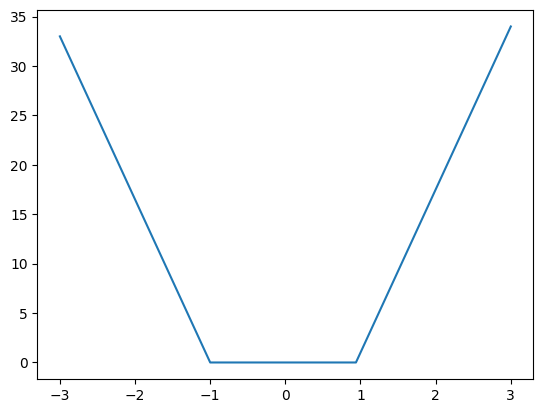

In [430]:
plt.plot(x, points_trinagle)

In [180]:
print(freq1[0])
print(freq2[0])

(266666+0j)
(533332.6666658332+0j)


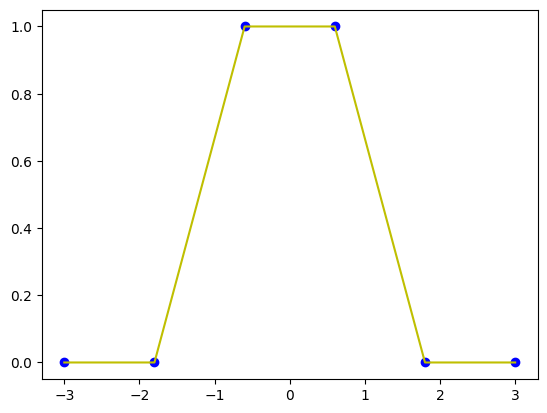

In [167]:
plt.plot(x, points1, c="y")
plt.scatter(x, irfft(freq1), c="b")

In [169]:
print(len(freq1))
x=np.linspace(1,4, 4)

4


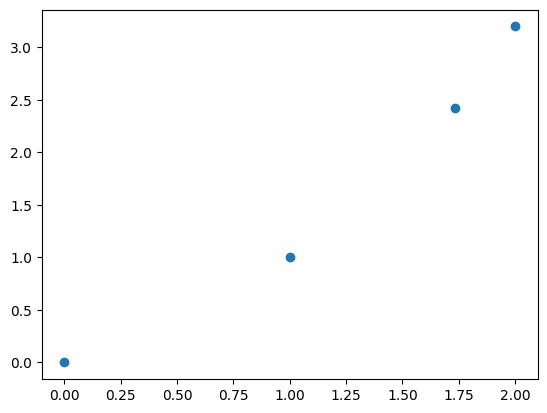

In [170]:
plt.scatter(np.abs(freq1), np.abs(freq2))

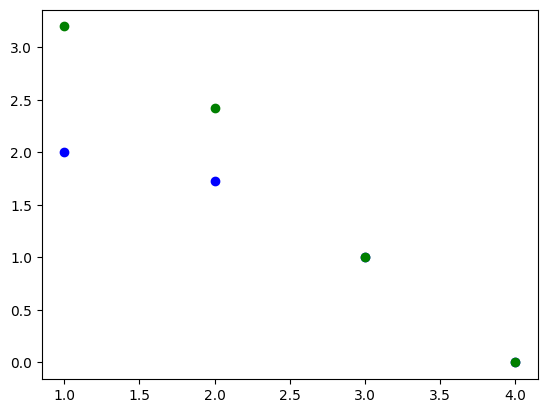

In [171]:
plt.scatter(x, np.abs(freq1),c="b")
plt.scatter(x, np.abs(freq2), c="g")

In [483]:
def func1(x):
    return np.sin(np.pi*x)

def func2(x):
    return np.sin(2*np.pi*x)


x=np.linspace(-3,3, 2000)
x2=np.linspace(-3,-1, 3)
points=[func1(i) for i in x]
points2=[func2(i) for  i in x2]
conv_points = (np.convolve(np.asarray(points), np.asarray(points), "full"))
#points2 = conv_points
#conv_points=[func2(i) for i in x]
#plt.plot(points, conv_points)

In [395]:
points

[-3.6739403974420594e-16,
 -0.0009425247827739155,
 -0.0018850487282525913,
 -0.002827570999142266,
 -0.0037700907581520752,
 -0.004712607167988056,
 -0.005655119391364552,
 -0.0065976265909978475,
 -0.007540127929610465,
 -0.008482622569923031,
 -0.009425109674674555,
 -0.01036758840659831,
 -0.01131005792844388,
 -0.01225251740296016,
 -0.013194965992917395,
 -0.014137402861083075,
 -0.0150798271702422,
 -0.016022238083189155,
 -0.016964634762732,
 -0.017907016371686107,
 -0.018849382072885577,
 -0.019791731029176852,
 -0.020734062403421256,
 -0.021676375358495734,
 -0.02261866905729359,
 -0.023560942662727014,
 -0.024503195337720714,
 -0.02544542624522332,
 -0.026387634548201026,
 -0.02732981940964188,
 -0.028271979992547658,
 -0.029214115459954122,
 -0.030156224974906925,
 -0.03109830770048365,
 -0.0320403627997768,
 -0.03298238943591585,
 -0.03392438677204313,
 -0.034866353971334106,
 -0.03580829019698924,
 -0.03675019461223649,
 -0.03769206638033388,
 -0.03863390466456308,
 -0.03

In [484]:
conv_points

array([1.34978380e-31, 6.92857616e-18, 8.89126974e-05, ...,
       8.89126974e-05, 6.92857616e-18, 1.34978380e-31])

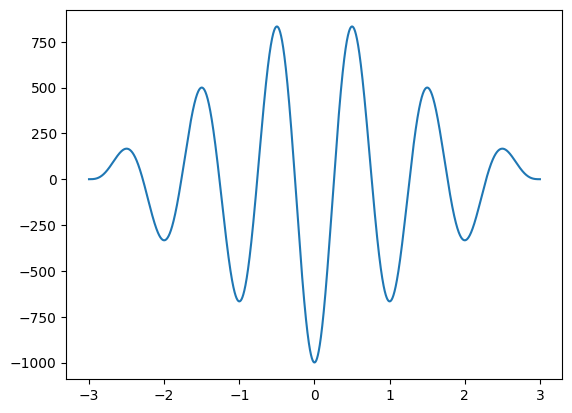

In [485]:
plt.plot(np.linspace(-3,3, 3999),conv_points)

In [398]:
rfft(points)

array([-2.42034040e-14+0.00000000e+00j, -5.89011764e-05+3.74976532e-01j,
       -3.76942086e-04+1.19984389e+00j, ...,
        4.71262496e-04-1.48051502e-07j,  4.71262496e-04-7.40257367e-08j,
        4.71262496e-04+0.00000000e+00j])

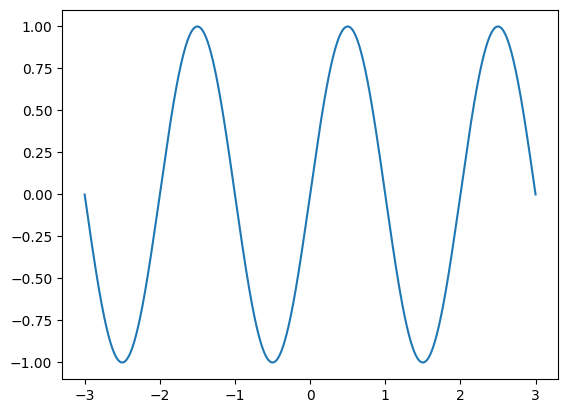

In [399]:
plt.plot(x, points)

In [400]:
rfft(points)[3]

(-4.7122708188685385+9999.748513272236j)

In [401]:
np.abs(((-4.711175680406885+999.7351294396907j))**2)

999492.5242120868

In [404]:
((rfft(points)[3])**2)

(-99994948.12319402-94243.04623023362j)

In [405]:
(rfft(conv_points)[3])

(74997497.6390798+7.071420983065684e-09j)

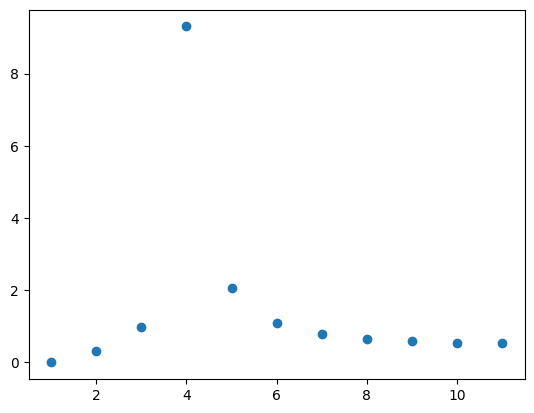

In [382]:
plt.scatter(np.linspace(1,11,11),(np.abs(rfft(points))))


[-33.80144881+3.14159265j  -0.98210762+1.57393792j
   0.17970005+1.57707951j   6.21409286+1.5802211j
   0.54257226-1.55822996j  -0.06239924-1.55508836j
  -0.40376717-1.55194677j  -0.6428548 -1.54880518j
  -0.82787542-1.54566359j  -0.97947477-1.54252199j]


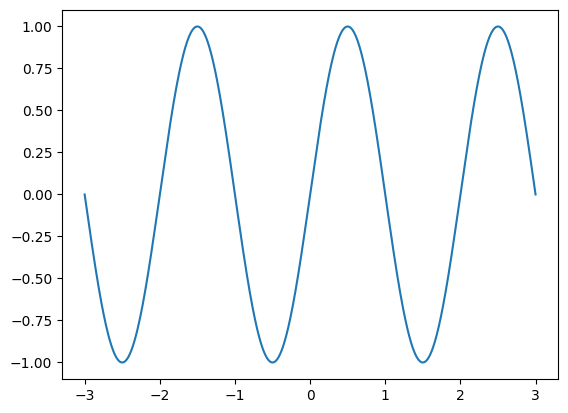

In [337]:
p=np.log(rfft(points))
print(p[:10])
p=irfft(np.exp(p))
plt.plot(x,p)

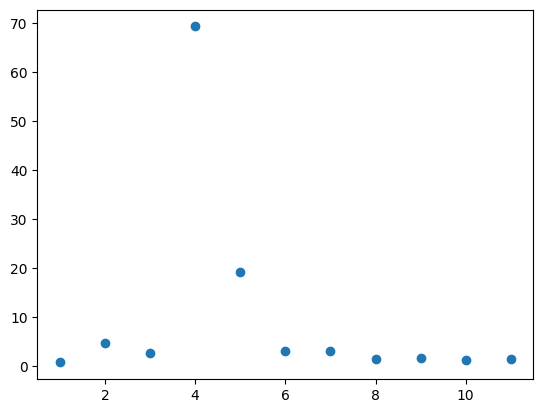

In [383]:
plt.scatter(np.linspace(1,11,11),  (np.abs(rfft(conv_points))))

In [393]:
np.abs(rfft(conv_points)[3])

749747.6313672874

In [328]:
rfft(points)[3]

(-4.709891871079327+499.72025182442053j)

In [329]:
rfft(points)[3]**2

(-249698.147002025-4707.256703763104j)

In [330]:
rfft(conv_points)[3]

(-1.1534678412539164e-14+7.342465079190667e-13j)

In [240]:
print(rfft(np.asarray(points))[:10])
print(rfft(np.asarray(conv_points))[:25])

[9.90318938e-14+0.j         1.30746939e-04-0.04161791j
 5.25725185e-04-0.08367066j 1.19329156e-03-0.12660842j
 2.14787035e-03-0.17091309j 3.41075046e-03-0.21711726j
 5.01131625e-03-0.2658271j  6.98884994e-03-0.31775163j
 9.39512355e-03-0.37374138j 1.22981220e-02-0.43484118j]
[-2.49038659e+02+0.00000000e+00j -7.39764787e+01+1.74674410e-13j
 -2.50781740e+02+1.80952171e-14j -7.25129518e+01-1.17524201e-12j
 -2.56160233e+02+1.79274058e-13j -6.92339827e+01+9.69557767e-13j
 -2.65655033e+02-1.63228376e-12j -6.33024131e+01+2.50781115e-13j
 -2.80192545e+02-8.93591404e-13j -5.30433424e+01-3.59642269e-12j
 -3.01393680e+02-9.76996262e-13j -3.51110051e+01-2.75483244e-12j
 -3.32098393e+02+2.01474600e-12j -2.41047429e+00-1.21247407e-12j
 -3.77539223e+02+5.44607886e-12j  6.17367175e+01-1.72153966e-12j
 -4.48288997e+02+9.14890091e-13j  2.03155421e+02+3.56782920e-12j
 -5.69106759e+02-8.73548581e-13j  5.82955990e+02+2.86684208e-12j
 -8.14256353e+02+2.36031400e-12j  2.09105129e+03-2.49909352e-12j
 -1.55347

In [234]:
print(np.abs(rfft(points[:5])), np.abs(rfft(conv_points[:5])))

[1.45299376 0.60713734 0.37120703] [1189.12686091   39.26286989   22.02941016]


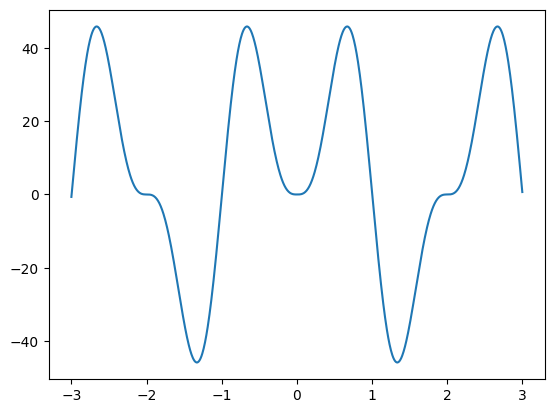

In [313]:
plt.plot(x, conv_points)

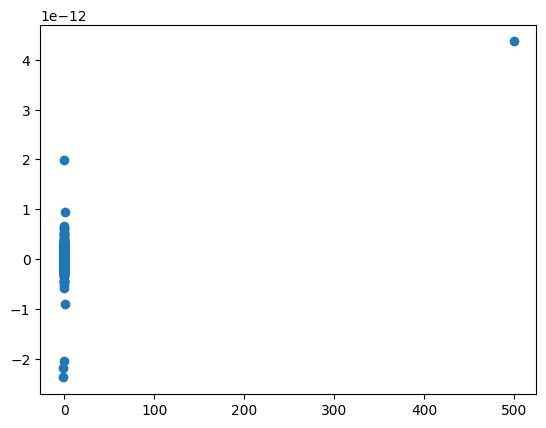

In [307]:
plt.scatter([i.imag for i in rfft(points)  ],[i.imag for i in rfft(conv_points)  ])

In [481]:
s=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
i=0
s[0:i+10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [482]:
i+=10
s[i:i+10]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]